# ICP + Non-linear least squares optimization

YOUR-NAME: Charchit Gupta

## Instructions

In [103]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Non Linear Least Squares Optimization

## 1.1 Gradient Descent
Implement the gradient descent algorithm using numpy and what you have learned from class to solve for the parameters of a gaussian distribution.
To understand the task in more detail and look at a worked through example, checkout the subsequent section. You have to implement the same using just numpy functions. You can refer to [Shubodh's notes](https://www.notion.so/saishubodh/From-linear-algebra-to-non-linear-weighted-least-squares-optimization-13cf17d318be4d45bb8577c4d3ea4a02) on the same to get a better grasp of the concept before implementing it.
* Experiment with the number of iterations.
* Experiment with the learning rate.
* Experiment with the tolerance.

Display your results using matplotlib by plotting graphs for 
* The cost function value vs the number of iterations
* The Ground Truth data values and the predicted data values.

Your plots are expected to contain information similar to the plot below:

<!-- <figure> -->
<img src='./helpers/sample_plt.png' alt=drawing width=500 height=600>

<!-- <figcaption align='center'><b>A sample plot, you can use your own plotting template</b></figcaption>
</figure> -->
<!-- head over to [this page](https://saishubodh.notion.site/Non-Linear-Least-Squares-Solved-example-Computing-Jacobian-for-a-Gaussian-Gradient-Descent-7fd11ebfee034f8ca89cc78c8f1d24d9) -->

## Worked out Example using Gradient Descent

A Gaussian distribution parametrized by $a,m,s$ is given by:

$$ y(x;a,m,s)=a \exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right) \tag{1}$$

### Jacobian of Gaussian

$$\mathbf{J}_y=\left[\frac{\partial y}{\partial a} \quad \frac{\partial y}{\partial m} \quad \frac{\partial y}{\partial s}\right] \\
= \left[ \exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right); \frac{a (x-m)}{s^2} \exp\left(\frac{-(x-m)^{2}}{2 s^{2}}\right);  \frac{a (x-m)^2}{s^3}\exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right)\right]$$

## Problem at hand

> Given a set of observations $y_{obs}$ and $x_{obs}$ we want to find the optimum parameters $a,m,s$ which best fit our observations given an initial estimate.

Our observations would generally be erroneous and given to us, but for the sake of knowing how good our model is performing, let us generate the observations ourselves by assuming the actual "actual" parameter values as $a_{gt}=10; m_{gt} =0; s_{gt} =20$ ($gt$ stands for ground truth). We will try to estimate these values based on our observations and let us see how close we get to "actual" parameters. Note that in reality we obviously don't have these parameters as that is exactly what we want to estimate in the first place. So let us consider the following setup, we have:

- Number of observations, $num\_obs = 50$
- Our 50 set of observations would be
    - $x_{obs} = np.linspace(-25,25, num\_obs)$
    - $y_{obs} = y(x_{obs};a_{gt},m_{gt},s_{gt})$  from $(1)$

Reference:

→[linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)

- Say we are given initial estimate as:

    $$a_0=10; \quad m_0=13; \quad s_0=19.12$$

### Residual and error to be minimized

Okay, now we have set of observations and an initial estimate of parameters. We would now want to minimize an error that would give us optimum parameters.

The $residual$ would be given by

$$ r(a,m,s) = \left[ a \exp \left(\frac{-(x_{obs}-m)^{2}}{2 s^{2}}\right) - y_{obs}\ \right]$$

where we'd want to minimize $\|r\|^2$. Note that $r$ is a non-linear function in $(a,m,s)$.

Also, note that since $y$ (and $x$) are observations in the above equation, after simplification, we get $\mathbf{J}_r = \mathbf{J}_y$ [above](https://www.notion.so/c9e6f71b67a44bb8b366df2fccfc12d0) (since $y_{obs}$ is a constant).

Let us apply Gradient Descent method for minimization here. From [Table I](https://www.notion.so/From-linear-algebra-to-non-linear-weighted-least-squares-optimization-13cf17d318be4d45bb8577c4d3ea4a02),  

$$\Delta \mathbf{k} = - \alpha \mathbf{J_F} = -\alpha \mathbf{J}_r^{\top} {r}(\mathbf{k})$$

Note that $\mathbf{J_F}$ is the Jacobian of "non-linear least squares" function $\mathbf{F}$ while $\mathbf{J}_r$ is the Jacobian of the residual. 

where $\mathbf{k}$ is $[a,m,s]^T$. 

- Some hyperparameters:
    - Learning rate, $lr = 0.01$
    - Maximum number of iterations, $num\_iter=200$
    - Tolerance, $tol = 1e-15$

## Solution for 1 iteration

To see how each step looks like, let us solve for 1 iteration and for simpler calculations, assume we have 3 observations, 

$$x_{obs}= \left[ -25, 0, 25 \right]^T, y_{obs} = \left[  4.5783, 10, 4.5783 \right]^T. $$

With our initial estimate as $\mathbf{k_0} = [a_0=10, \quad m_0=13, \quad s_0=19.12]^T$, the residual would be 

$$ r(a_0,m_0,s_0) = \left[ a_0 \exp \left(\frac{-(x_{obs}-m_0)^{2}}{2 s_0^{2}}\right) - y_{obs}\ \right]$$

Therefore, $r=[-3.19068466, -2.0637411 , 3.63398058]^T$.

### Gradient Computation

Gradient, $\mathbf{J_F}$=

$$\mathbf{J_r}^{\top} \mathbf{r}(\mathbf{k})$$

We have calculated residual already [above](https://www.notion.so/c9e6f71b67a44bb8b366df2fccfc12d0), let us calculate the Jacobian $\mathbf{J_r}$.

$$\mathbf{J}_r
= \left[ \exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right); \frac{a (x-m)}{s^2} \exp\left(\frac{-(x-m)^{2}}{2 s^{2}}\right);  \frac{a (x-m)^2}{s^3}\exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right)\right]$$

$$\implies \mathbf{J_r} = \left[ \begin{array}{rrr}0.1387649 & 0.79362589, & 0.82123142 \\-0.14424057 & -0.28221715  & 0.26956967 \\0.28667059 & 0.19188405, & 0.16918599\end{array}\right]$$

So ,

$$\mathbf{J_F} = \mathbf{J_r}^{\top} \mathbf{r}(\mathbf{k})$$

$$\mathbf{r}(\mathbf{k}) =  \left[ \begin{array}{r}-3.19068466 \\ -2.0637411 \\ 3.63398058 \end{array} \right]$$

$$ \begin{aligned} \implies \mathbf{J_F} = \left[ \begin{array}{r} 0.89667553 \\ -1.25248392 \\-2.56179392\end{array} \right] \end{aligned}$$

### Update step

$$
\Delta \mathbf{k} = - \alpha \mathbf{J_F} \\
\mathbf{k}^{t+1} = \mathbf{k}^t + \Delta \mathbf{k}
$$

Here, $\alpha$ our learning rate is 0.01.

$$
\Delta \mathbf{k} = - \alpha\times\left[ \begin{array}{r} 
0.89667553 \\ -1.25248392 \\-2.56179392
\end{array} \right] = \left[ \begin{array}{r}
-0.00896676 \\ 0.01252484 \\0.02561794
\end{array}\right]
$$

$$
\mathbf{k}^{1} = \mathbf{k}^{0} + \Delta \mathbf{k} \\ \left[\begin{array}{r} 10 \\ 13 \\ 19.12 \end{array}\right] + \left[\begin{array}{c} 9.99103324 \\ 13.01252484 \\ 19.14561794 \end{array} \right]
$$

With just one iteration with very few observations, we can see that we have gotten *slightly* more closer to our GT parameter  $a_{gt}=10; m_{gt} =0; s_{gt} =20$. Our initial estimate was $[a_0=10, \quad m_0=13, \quad s_0=19.12]$. However, the above might not be noticeable enough: Hence you need to code it for more iterations and convince yourself as follows:

In [104]:
from helpers.func import make_gaussian
#ground truth values:
a_gt = 10
m_gt = 0
s_gt = 20

def gradient_descent(num_obs,iter, alpha, tolerance,a,m,s):
    
    #defining x and y
    x_obs = np.ndarray((num_obs,1))
    x_obs[:,0] = np.linspace(-25,25,num_obs)
    y_obs = make_gaussian(x_obs,a_gt,m_gt,s_gt)
    
    #Initial values
    k = np.ndarray((3,1))
    k[0,0] = a
    k[1,0] = m
    k[2,0] = s

    #Storing initial cost function
    r_k = (make_gaussian(x_obs,a,m,s) - y_obs)
    r_temp = np.linalg.norm(r_k)**2
    cost_func = [r_temp]

    for i in range(0,iter):
        
        a = k[0,0]
        m = k[1,0]
        s = k[2,0]

        delta = 1e-4
        dy_da = (make_gaussian(x_obs,a+delta,m,s) - make_gaussian(x_obs,a,m,s))/delta
        dy_dm = (make_gaussian(x_obs,a,m+delta,s) - make_gaussian(x_obs,a,m,s))/delta
        dy_ds = (make_gaussian(x_obs,a,m,s+delta) - make_gaussian(x_obs,a,m,s))/delta
        
        #Jacobian of residual
        Jr = np.c_[dy_da,dy_dm,dy_ds]
        
        #Error function
        r_k = make_gaussian(x_obs,a,m,s) - y_obs

        #Store current cost funciton
        r_temp = np.linalg.norm(r_k)**2
        cost_func.append(r_temp)
        
        #Jacobian of non-linear least squares
        Jf = Jr.transpose() @ r_k
        del_k = -alpha*Jf
        k_updated = k + del_k       #Store new parameters

        # If the differences b/w all values of updated parameters and their corresponding values of current parameters are less than tolerance:
        if(np.all(k_updated-k)<tolerance):
            return k_updated,cost_func

        #Update parameters    
        k = k_updated

    return k,cost_func       

Estimated Parameters =  [[1.00849601e+01 3.50793750e-03 2.02517829e+01]]
Final Cost = 3.0301613371009173e-05


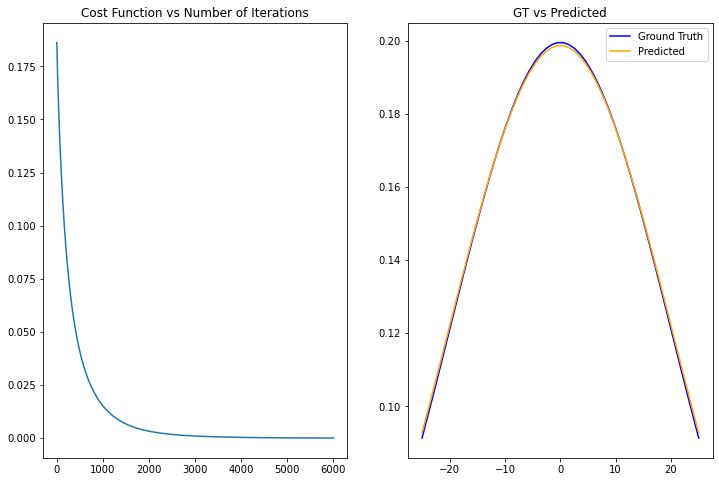

In [105]:
#Gradient Descent:
num_obs = 50
iter = 6000
alpha = 1.5
tolerance = 1e-15
a = 10
m = 13
s = 19.12
k,cost_func = gradient_descent(num_obs,iter,alpha,tolerance,a,m,s)

print("Estimated Parameters = ",k.T)
print("Final Cost =", cost_func[-1])

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,8))

#Plotting Cost function vs number of iter.
ax1.plot(cost_func)
ax1.set_title("Cost Function vs Number of Iterations")

#Plotting GT data values vs Predicted data values
x = np.linspace(-25,25,num_obs)
y_gt = make_gaussian(x,a_gt,m_gt,s_gt)
y_pred = make_gaussian(x,k[0,0],k[1,0],k[2,0])
ax2.plot(x,y_gt,color='blue',label='Ground Truth')
ax2.plot(x,y_pred,color='orange',label = 'Predicted')
ax2.set_title("GT vs Predicted")
ax2.legend(loc='best')

## 1.2: Another Non-Linear function
Now that you've got the hang of computing the jacobian matrix for a non-linear function via the aid of an example, try to compute the jacobian of a secondary gaussian function by carrying out steps similar to what has been shown above. The function is plotted below:<br>
<img src='./helpers/non_linear.png' alt=drawing width=500 height=600>
<br>Using the computed jacobian, optimise for the four parameters using gradient descent, where the parameters to be estimated are: 

$p_1$ = 2,  $p_2$ = 8,  $p_3$ = 4,  $p_4$ = 8. 

Do this for $x_{obs} = np.linspace(-20,30, num\_obs)$,
where $num\_obs$ is 50.



The function we are given is:
$$ y(x;p_1,p_2,p_3,p_4)= p_1\exp \left(\frac{-x}{p_2}\right) + p_3 \sin(\frac{x}{p_4})\tag{1}$$

We have to estimate the function with ground truth values of parameters as: $p_1gt = 2, p_2gt=8, p_3gt=4, p_4gt=8$

#### Jacobian of the function is
$$\mathbf{J}_y=\left[\frac{\partial y}{\partial p_1} \quad \frac{\partial y}{\partial p_2} \quad \frac{\partial y}{\partial p_3} \quad \frac{\partial y}{\partial p_4}\right] \\
\mathbf{J}_y= \left[ \exp \left(\frac{-x}{p_2}\right); \frac{p_1*x}{p_2^2} \exp \left(\frac{-x}{p_2}\right); \sin(\frac{x}{p_4}); \frac{-p_3 * x}{p_4^2} \cos(\frac{x}{p_4}) \right]$$

Now residual will be given by:
$$ r(p_1est,p_2est,p_3est,p_4est) = \left[ (p_1est)\exp \left(\frac{-x}{p_2est}\right) + (p_3est) \sin(\frac{x}{p_4est})\tag{1} - y_{obs}\ \right]$$

where  $ (p_1est,p_2est,p_3est,p_4est) $ denote the estimated parameters.

As the Jacobian of the residual($J_r$) will be same as $J_y$, we have 
$$\mathbf{J}_r= \left[ \exp \left(\frac{-x}{p_2}\right); \frac{p_1*x}{p_2^2} \exp \left(\frac{-x}{p_2}\right); \sin(\frac{x}{p_4}); \frac{-p_3 * x}{p_4^2} \cos(\frac{x}{p_4}) \right]$$

The initial values are taken randomly.<br>
The rest of the approach will be similar to previous part.

In [106]:
from helpers.func import make_non_linear

#ground truth values:
p1gt = 2
p2gt = 8
p3gt = 4
p4gt = 8

def make_func(x, p1,p2,p3,p4):
    y = p1*np.exp(-x/p2) + p3*np.sin(x/p4)
    return y

def gradient_descent_2(num_obs,iter, alpha, tolerance):

     #defining x and y
    x_obs = np.ndarray((num_obs,1))
    x_obs[:,0] = np.linspace(-20,30,num_obs)
    y_obs = make_func(x_obs,p1gt,p2gt,p3gt,p4gt)

    #Initial values are taken randomly between 0 to 10
    p1 = 13
    p2 = 20
    p3 = 20
    p4 = 10
    k = np.ndarray((4,1))
    k[0,0] = p1
    k[1,0] = p2
    k[2,0] = p3
    k[3,0] = p4

    #Storing initial cost function
    r_k = (make_func(x_obs,p1,p2,p3,p4) - y_obs)
    r_temp = np.linalg.norm(r_k)**2
    cost_func = [r_temp, ]

    for i in range(0,iter):
        
        p1 = k[0,0]
        p2 = k[1,0]
        p3 = k[2,0]
        p4 = k[3,0]
        
        dy_dp1 = np.exp(-x_obs/p2)
        dy_dp2 = p1*np.exp(-x_obs/p2) *(x_obs/(p2**2))   
        dy_dp3 = np.sin(x_obs/p4)
        dy_dp4 = p3*(-x_obs/(p4**2)) * np.cos(x_obs/p4)

        #Jacobian of residual
        Jr = np.c_[dy_dp1, dy_dp2, dy_dp3, dy_dp4]

        #Error function
        r_k = (make_func(x_obs,p1,p2,p3,p4) - y_obs)
        
        #Store current cost funciton
        r_temp = np.linalg.norm(r_k)**2
        cost_func.append(r_temp)

        #Jacobian of non-linear least squares
        Jf = Jr.transpose()@r_k
        del_k = -alpha*Jf
        k_updated = k + del_k           #store new parameters
        
        # If the differences b/w all values of updated parameters and their corresponding values of current parameters are less than tolerance:
        if(np.all(k_updated-k)<tolerance):
            return k_updated,cost_func

        #Update parameters    
        k = k_updated

    return k,cost_func


Estimated Parameters =  [[2.08314773 8.15899912 4.01917534 7.96909014]]
Final Cost = 0.24106832955283464


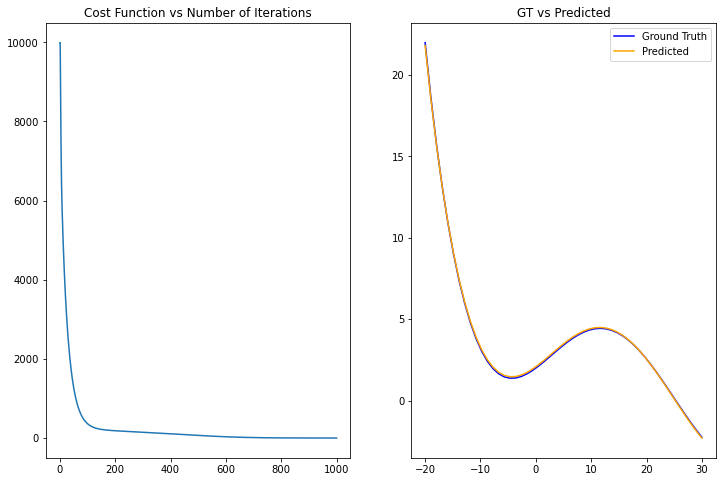

In [107]:
#Gradient Descent:
num_obs = 50
iter = 1000
alpha = 0.001
tolerance = 1e-15

k,cost_func = gradient_descent_2(num_obs,iter,alpha,tolerance)

print("Estimated Parameters = ",k.T)
print("Final Cost =", cost_func[-1])

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,8))

#Plotting Cost function vs number of iter.
ax1.plot(cost_func)
ax1.set_title("Cost Function vs Number of Iterations")

#Plotting GT data values vs Predicted data values
x = np.linspace(-20,30,num_obs)
y_gt = make_func(x,p1gt,p2gt,p3gt,p4gt)
y_pred = make_func(x,k[0,0],k[1,0],k[2,0],k[3,0])
ax2.plot(x,y_gt,color='blue',label='Ground Truth')
ax2.plot(x,y_pred,color='orange',label = 'Predicted')
ax2.set_title("GT vs Predicted")
ax2.legend(loc='best')

## 1.3: Different Optimizers

Replace gradient descent with Gauss-Newton and Levenberg Marquardt algorithms and repeat question 1.1. 

To quickly recap, Gauss-Newton and Levenberg Marquardt are alternate update rules to the standard gradient descent. Gauss Newton updates work as:

$$\delta x = -(J^TJ)^{-1}J^Tf(x)$$

Levenberg Marquardt lies somewhere between Gauss Newton and Gradient Descent algorithms by blending the two formulations. As a result, when at a steep cliff, LM takes small steps to avoid overshooting, and when at a gentle slope, LM takes bigger steps:


$$\delta x = -(J^TJ + \lambda I)^{-1}J^Tf(x)$$

**Questions**
   * 1. How does the choice of initial estimate and learning rate affect convergence? Observations and analysis from repeated runs with modified hyperparameters will suffice.
   * 2. Do you notice any difference between the three optimizers? Why do you think that is? (If you are unable to see a clear trend, what would you expect in general based on what you know about them)

In [108]:
def gauss_newton(num_obs,iter, tolerance,a,m,s):
    
    #defining x and y
    x_obs = np.ndarray((num_obs,1))
    x_obs[:,0] = np.linspace(-25,25,num_obs)
    y_obs = make_gaussian(x_obs,a_gt,m_gt,s_gt)

    #Initial values
    k = np.ndarray((3,1))
    k[0,0] = a
    k[1,0] = m
    k[2,0] = s

    #Storing initial cost function
    r_k = (make_gaussian(x_obs,a,m,s) - y_obs)
    r_temp = np.linalg.norm(r_k)**2
    cost_func = [r_temp]

    for i in range(0,iter):
        
        a = k[0,0]
        m = k[1,0]
        s = k[2,0]
       
        delta = 1e-4
        dy_da = (make_gaussian(x_obs,a+delta,m,s) - make_gaussian(x_obs,a,m,s))/delta
        dy_dm = (make_gaussian(x_obs,a,m+delta,s) - make_gaussian(x_obs,a,m,s))/delta
        dy_ds = (make_gaussian(x_obs,a,m,s+delta) - make_gaussian(x_obs,a,m,s))/delta
        
        #Jacobian of residual
        Jr = np.c_[dy_da,dy_dm,dy_ds]
        
        #Error function
        r_k = make_gaussian(x_obs,a,m,s) - y_obs

        #Store current cost funciton
        r_temp = np.linalg.norm(r_k)**2
        cost_func.append(r_temp)
        
        #Updating parameters
        del_k = -np.linalg.pinv(Jr.transpose() @ Jr) @ Jr.transpose() @ r_k
        k_updated = k + del_k       #Store new parameters

        # If the differences b/w all values of updated parameters and their corresponding values of current parameters are less than tolerance:
        if(np.all(k_updated-k)<tolerance):
            return k_updated,cost_func

        #Update parameters    
        k = k_updated

    return k,cost_func 

In [109]:

def levenberg_marquardt(num_obs,iter, Lambda, tolerance,a,m,s):    
    
    #defining x and y
    x_obs = np.ndarray((num_obs,1))
    x_obs[:,0] = np.linspace(-25,25,num_obs)
    y_obs = make_gaussian(x_obs,a_gt,m_gt,s_gt)

    #Initial values
    k = np.ndarray((3,1))
    k[0,0] = a
    k[1,0] = m
    k[2,0] = s

    #Storing initial cost function
    r_k = (make_gaussian(x_obs,a,m,s) - y_obs)
    r_temp = np.linalg.norm(r_k)**2
    cost_func = [r_temp]

    for i in range(0,iter):
        
        a = k[0,0]
        m = k[1,0]
        s = k[2,0]
        
        delta = 1e-4
        dy_da = (make_gaussian(x_obs,a+delta,m,s) - make_gaussian(x_obs,a,m,s))/delta
        dy_dm = (make_gaussian(x_obs,a,m+delta,s) - make_gaussian(x_obs,a,m,s))/delta
        dy_ds = (make_gaussian(x_obs,a,m,s+delta) - make_gaussian(x_obs,a,m,s))/delta
        
        #Jacobian of residual
        Jr = np.c_[dy_da,dy_dm,dy_ds]
        
        #Error function
        r_k = make_gaussian(x_obs,a,m,s) - y_obs

        #Store current cost funciton
        r_temp = np.linalg.norm(r_k)**2
        cost_func.append(r_temp)
        
        #Jacobian of non-linear least squares
        del_k = -np.linalg.pinv((Jr.transpose() @ Jr) + (Lambda * np.eye(Jr.shape[1]))) @ Jr.transpose() @ r_k
        k_updated = k + del_k       #Store new parameters
        
        #Change Lambda:
        if r_temp>cost_func[-1]:
            Lambda = Lambda*2
        else :
            Lambda = Lambda/3
            
        # If the differences b/w all values of updated parameters and their corresponding values of current parameters are less than tolerance:
        if(np.all(k_updated-k)<tolerance):
            return k_updated,cost_func

        #Update parameters    
        k = k_updated

    return k,cost_func 

Estimated Parameters =  [[ 1.00000000e+01 -5.73093497e-16  2.00000000e+01]]
Final Cost = 7.703719777548943e-34


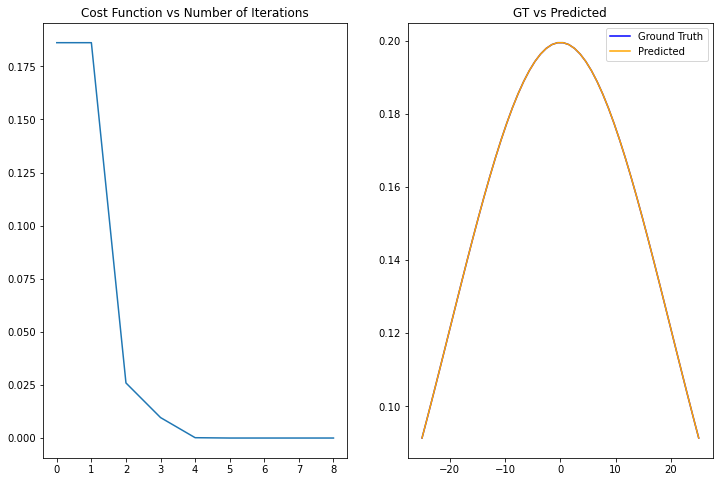

In [110]:
#Gauss Newton:
num_obs = 50
iter = 10
tolerance = 1e-15
a = 10
m = 13
s = 19.12

k,cost_func = gauss_newton(num_obs,iter,tolerance,a,m,s)

print("Estimated Parameters = ",k.T)
print("Final Cost =", cost_func[-1])

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,8))

#Plotting Cost function vs number of iter.
ax1.plot(cost_func)
ax1.set_title("Cost Function vs Number of Iterations")
#ax1.xlabel('Number of Iterations')
#ax1.ylabel('Cost Function')

#Plotting GT data values vs Predicted data values
x = np.linspace(-25,25,num_obs)
y_gt = make_gaussian(x,a_gt,m_gt,s_gt)
y_pred = make_gaussian(x,k[0,0],k[1,0],k[2,0])
ax2.plot(x,y_gt,color='blue',label='Ground Truth')
ax2.plot(x,y_pred,color='orange',label = 'Predicted')
ax2.set_title("GT vs Predicted")
ax2.legend(loc='best')

Estimated Parameters =  [[ 1.00222716e+01 -2.24255152e-03  2.00740396e+01]]
Final Cost = 0.0005858615330391562


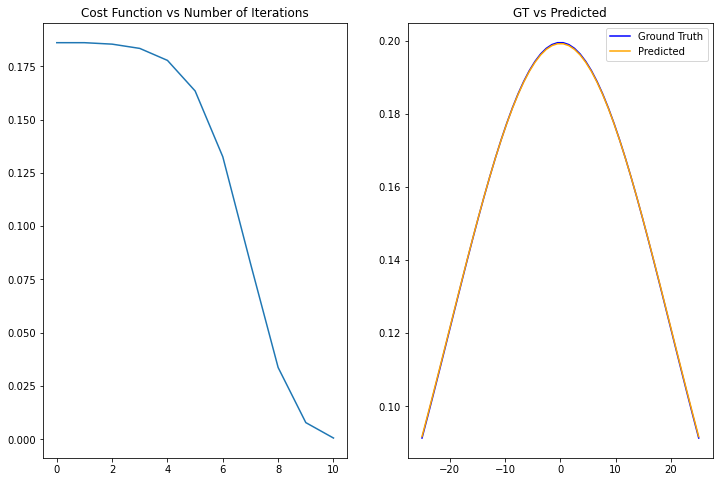

In [111]:
#Levenberg Marquardt:
num_obs = 50
iter = 10
Lambda = 1
tolerance = 1e-15
a = 10
m = 13
s = 19.12

k,cost_func = levenberg_marquardt(num_obs,iter,Lambda,tolerance,a,m,s)

print("Estimated Parameters = ",k.T)
print("Final Cost =", cost_func[-1])

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,8))

#Plotting Cost function vs number of iter.
ax1.plot(cost_func)
ax1.set_title("Cost Function vs Number of Iterations")
#ax1.xlabel('Number of Iterations')
#ax1.ylabel('Cost Function')

#Plotting GT data values vs Predicted data values
x = np.linspace(-25,25,num_obs)
y_gt = make_gaussian(x,a_gt,m_gt,s_gt)
y_pred = make_gaussian(x,k[0,0],k[1,0],k[2,0])
ax2.plot(x,y_gt,color='blue',label='Ground Truth')
ax2.plot(x,y_pred,color='orange',label = 'Predicted')
ax2.set_title("GT vs Predicted")
ax2.legend(loc='best')

# Now we will tweak the hyperparameters to observe changes in estimation:

# 1 Varying Parameters of Gradient Descent

In [112]:
def plot_GD(iter,alpha,tolerance,a,m,s):
    num_obs=50
    k,cost_func = gradient_descent(num_obs,iter,alpha,tolerance,a,m,s)

    print("Estimated Parameters = ",k.T)
    print("Final Cost =", cost_func[-1])

    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,8))

    #Plotting Cost function vs number of iter.
    ax1.plot(cost_func)
    ax1.set_title("Cost Function vs Number of Iterations")

    #Plotting GT data values vs Predicted data values
    x = np.linspace(-25,25,num_obs)
    y_gt = make_gaussian(x,a_gt,m_gt,s_gt)
    y_pred = make_gaussian(x,k[0,0],k[1,0],k[2,0])
    ax2.plot(x,y_gt,color='blue',label='Ground Truth')
    ax2.plot(x,y_pred,color='orange',label = 'Predicted')
    ax2.set_title("GT vs Predicted")
    ax2.legend(loc='best')

## Varying number of iterations

Number of iterations =  5000
Estimated Parameters =  [[10.22528537  0.10344628 20.66860608]]
Final Cost = 0.00021377584950206933


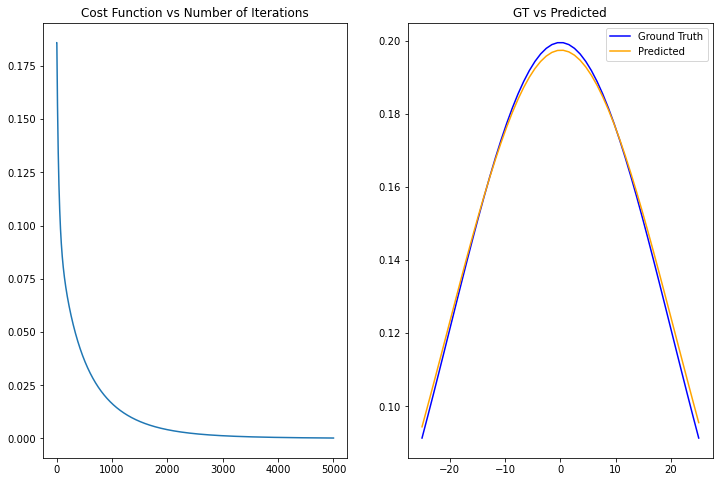

Number of iterations =  2000
Estimated Parameters =  [[10.61081463  1.79381686 21.82755181]]
Final Cost = 0.0041262480707685715


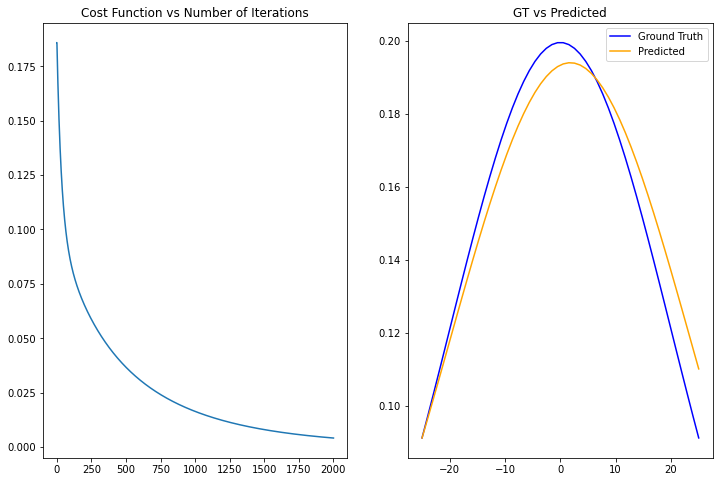

Number of iterations =  500
Estimated Parameters =  [[10.49572962  6.37256544 21.61567668]]
Final Cost = 0.03667458829762155


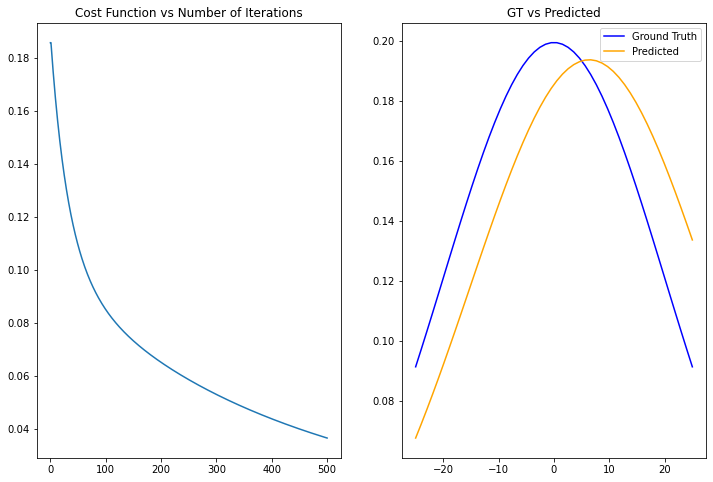

Number of iterations =  100
Estimated Parameters =  [[10.56570091  9.0732313  20.35526438]]
Final Cost = 0.08513446743444844


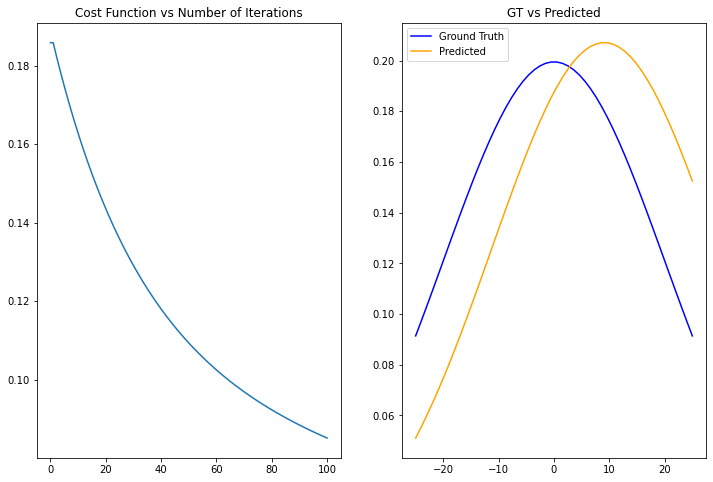

In [113]:
iter = 5000
alpha = 1
tolerance = 1e-16
a = 12
m = 10
s = 19.12
print("Number of iterations = ",iter)
plot_GD(iter,alpha,tolerance,a,m,s)
plt.show()

iter = 2000
alpha = 1
tolerance = 1e-16
a = 12
m = 10
s = 19.12
print("Number of iterations = ",iter)
plot_GD(iter,alpha,tolerance,a,m,s)
plt.show()

iter = 500
alpha = 1
tolerance = 1e-16
a = 12
m = 10
s = 19.12
print("Number of iterations = ",iter)
plot_GD(iter,alpha,tolerance,a,m,s)
plt.show()

iter = 100
alpha = 1
tolerance = 1e-16
a = 12
m = 10
s = 19.12
print("Number of iterations = ",iter)
plot_GD(iter,alpha,tolerance,a,m,s)
plt.show()

## Varying Learning Rate

Learning Rate =  500
Estimated Parameters =  [[ 59.96155091   7.76558082 151.87212069]]
Final Cost = 0.0587032901364807


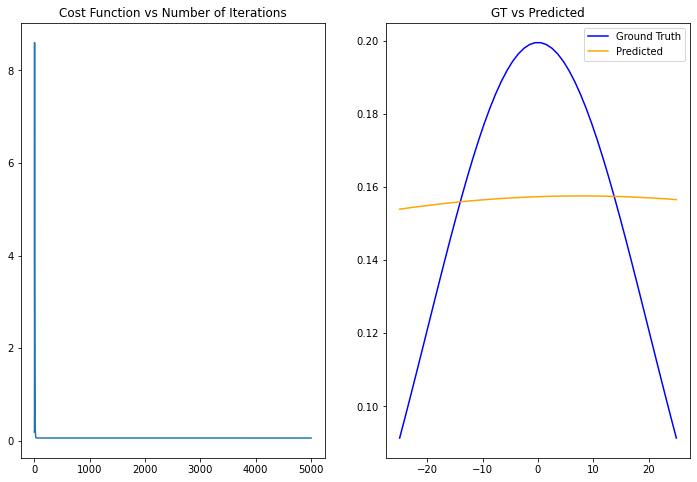

Learning Rate =  1
Estimated Parameters =  [[10.22528537  0.10344628 20.66860608]]
Final Cost = 0.00021377584950206933


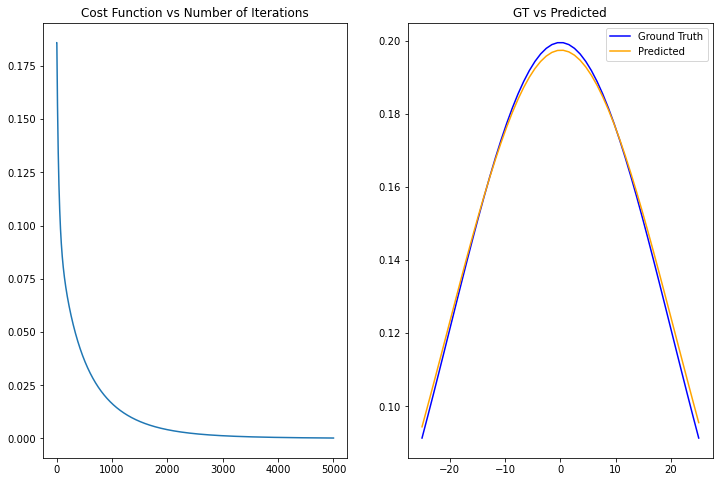

Learning Rate =  0.01
Estimated Parameters =  [[11.00064084  9.51584668 19.90197431]]
Final Cost = 0.10883828523212809


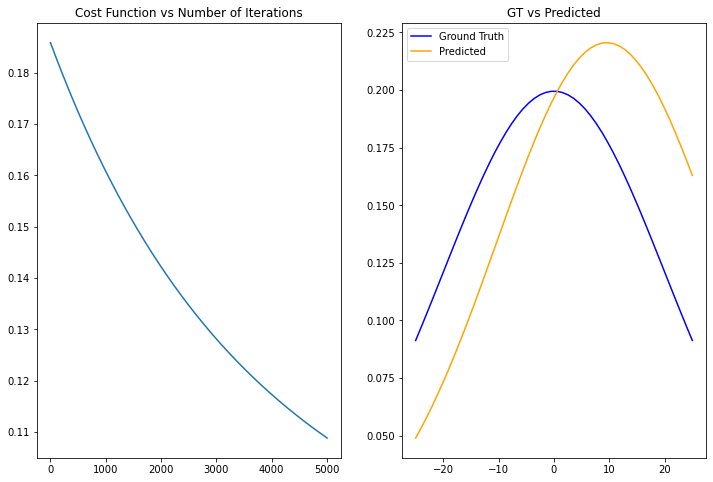

Learning Rate =  0.001
Estimated Parameters =  [[11.8576374   9.94925375 19.22427841]]
Final Cost = 0.1723516303299097


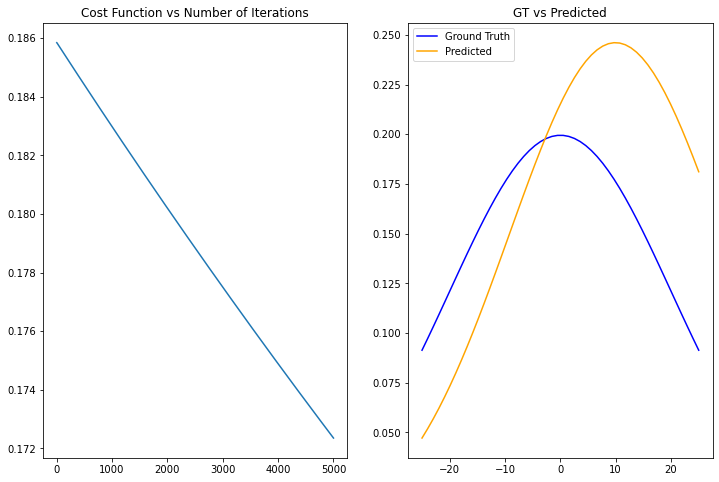

In [114]:
iter = 5000
alpha = 500
tolerance = 1e-16
a = 12
m = 10
s = 19.12
print("Learning Rate = ",alpha)
plot_GD(iter,alpha,tolerance,a,m,s)
plt.show()

iter = 5000
alpha = 1
tolerance = 1e-16
a = 12
m = 10
s = 19.12
print("Learning Rate = ",alpha)
plot_GD(iter,alpha,tolerance,a,m,s)
plt.show()

iter = 5000
alpha = 0.01
tolerance = 1e-16
a = 12
m = 10
s = 19.12
print("Learning Rate = ",alpha)
plot_GD(iter,alpha,tolerance,a,m,s)
plt.show()

iter = 5000
alpha = 0.001
tolerance = 1e-16
a = 12
m = 10
s = 19.12
print("Learning Rate = ",alpha)
plot_GD(iter,alpha,tolerance,a,m,s)
plt.show()

## Varying Tolerance

Tolerance =  100
Estimated Parameters =  [[11.97026633  9.98979199 19.14166925]]
Final Cost = 0.1858428345030164


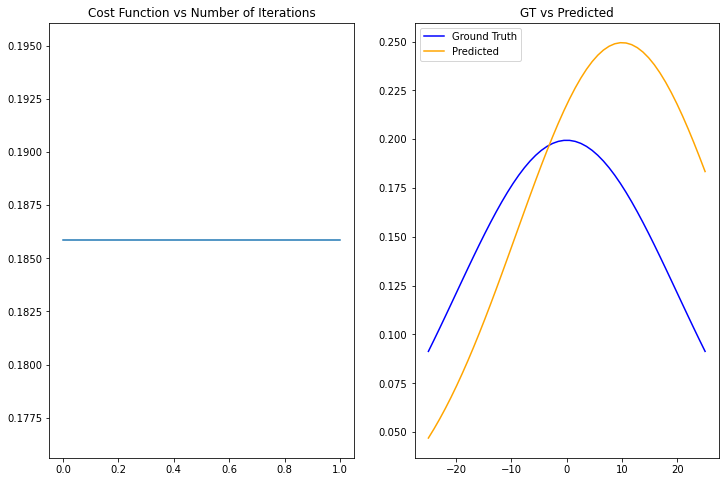

Tolerance =  0.01
Estimated Parameters =  [[10.22528537  0.10344628 20.66860608]]
Final Cost = 0.00021377584950206933


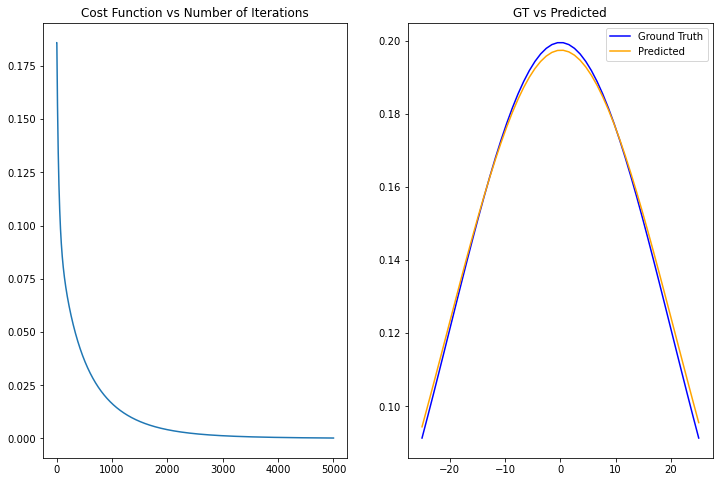

Tolerance =  0.0001
Estimated Parameters =  [[10.22528537  0.10344628 20.66860608]]
Final Cost = 0.00021377584950206933


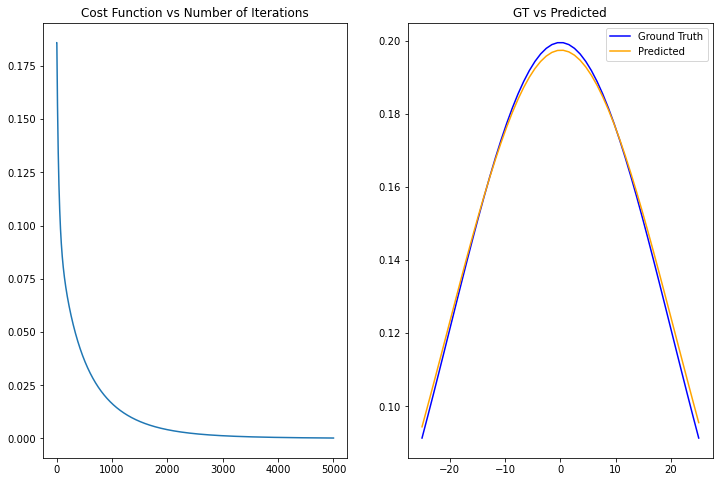

Tolerance =  1e-16
Estimated Parameters =  [[10.22528537  0.10344628 20.66860608]]
Final Cost = 0.00021377584950206933


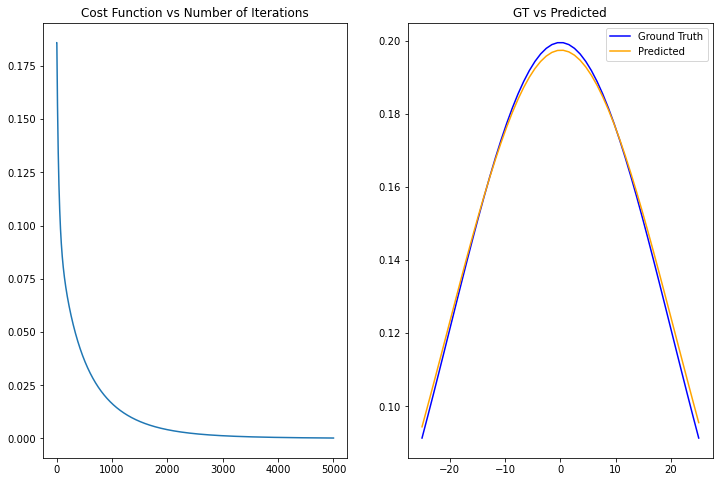

In [115]:
iter = 5000
alpha = 1
tolerance = 100
a = 12
m = 10
s = 19.12
print("Tolerance = ",tolerance)
plot_GD(iter,alpha,tolerance,a,m,s)
plt.show()

iter = 5000
alpha = 1
tolerance = 1e-2
a = 12
m = 10
s = 19.12
print("Tolerance = ",tolerance)
plot_GD(iter,alpha,tolerance,a,m,s)
plt.show()

iter = 5000
alpha = 1
tolerance = 1e-4
a = 12
m = 10
s = 19.12
print("Tolerance = ",tolerance)
plot_GD(iter,alpha,tolerance,a,m,s)
plt.show()

iter = 5000
alpha = 1
tolerance = 1e-16
a = 12
m = 10
s = 19.12
print("Tolerance = ",tolerance)
plot_GD(iter,alpha,tolerance,a,m,s)
plt.show()

## Varying Initial Values

a,m,s =  12 10 19.12
Estimated Parameters =  [[10.22528537  0.10344628 20.66860608]]
Final Cost = 0.00021377584950206933


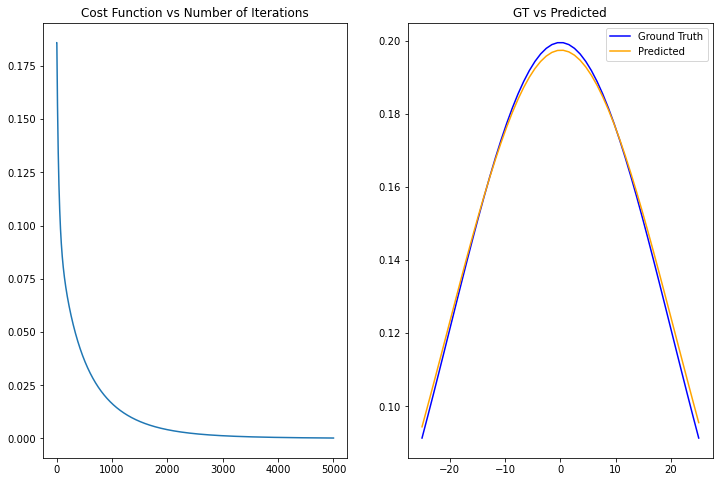

a,m,s =  20 4 10
Estimated Parameters =  [[9.94669965e+00 7.68411047e-03 1.98422980e+01]]
Final Cost = 1.256658037469104e-05


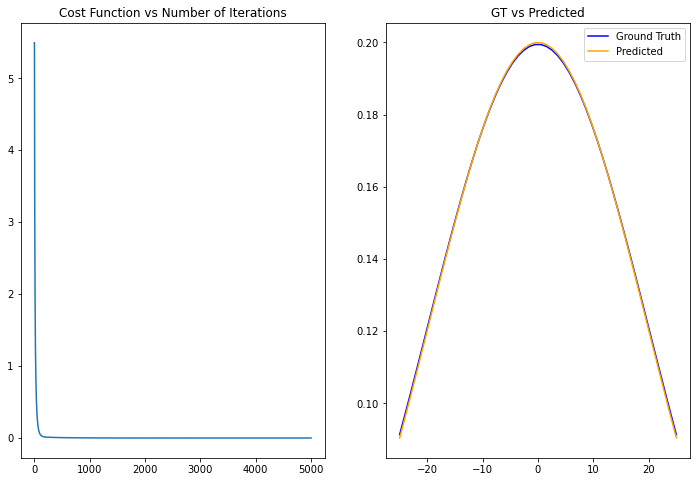

a,m,s =  5 1 2
Estimated Parameters =  [[9.87898414e+00 6.56463168e-04 1.96422689e+01]]
Final Cost = 6.59576093443285e-05


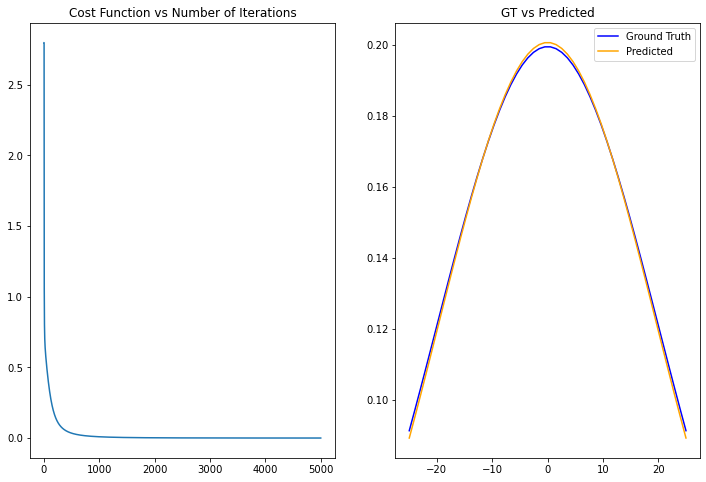

a,m,s =  30 30 30
Estimated Parameters =  [[20.8919672  22.50215847 46.36380721]]
Final Cost = 0.07008658811908551


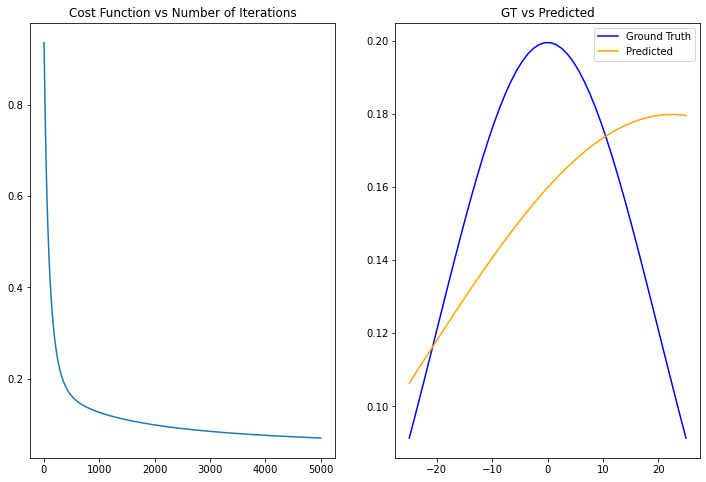

In [116]:
iter = 5000
alpha = 1
tolerance = 1e-16
a = 12
m = 10
s = 19.12
print("a,m,s = ",a,m,s)
plot_GD(iter,alpha,tolerance,a,m,s)
plt.show()

iter = 5000
alpha = 1
tolerance = 1e-16
a = 20
m = 4
s = 10
print("a,m,s = ",a,m,s)
plot_GD(iter,alpha,tolerance,a,m,s)
plt.show()

iter = 5000
alpha = 1
tolerance = 1e-16
a = 5
m = 1
s = 2
print("a,m,s = ",a,m,s)
plot_GD(iter,alpha,tolerance,a,m,s)
plt.show()

iter = 5000
alpha = 1
tolerance = 1e-16
a = 30
m = 30
s = 30
print("a,m,s = ",a,m,s)
plot_GD(iter,alpha,tolerance,a,m,s)
plt.show()

# 2 Varying Parameters of Gauss Newton

In [117]:
def plot_GN(iter,tolerance,a,m,s):
    #Gauss Newton:
    num_obs = 50
    k,cost_func = gauss_newton(num_obs,iter,tolerance,a,m,s)

    print("Estimated Parameters = ",k.T)
    print("Final Cost =", cost_func[-1])

    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,8))

    #Plotting Cost function vs number of iter.
    ax1.plot(cost_func)
    ax1.set_title("Cost Function vs Number of Iterations")
    #ax1.xlabel('Number of Iterations')
    #ax1.ylabel('Cost Function')

    #Plotting GT data values vs Predicted data values
    x = np.linspace(-25,25,num_obs)
    y_gt = make_gaussian(x,a_gt,m_gt,s_gt)
    y_pred = make_gaussian(x,k[0,0],k[1,0],k[2,0])
    ax2.plot(x,y_gt,color='blue',label='Ground Truth')
    ax2.plot(x,y_pred,color='orange',label = 'Predicted')
    ax2.set_title("GT vs Predicted")
    ax2.legend(loc='best')

## Varying number of iterations

Number of iterations =  2
Estimated Parameters =  [[ 9.86928712 -0.74871573 19.86319534]]
Final Cost = 0.013791272234106028


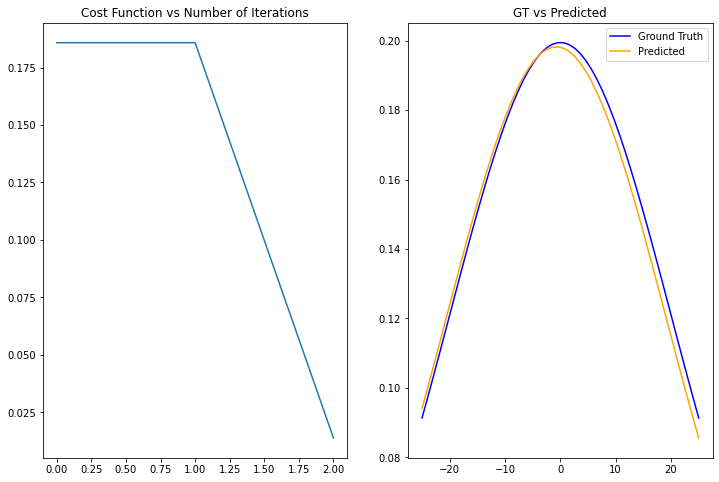

Number of iterations =  4
Estimated Parameters =  [[9.99999504e+00 3.05084401e-06 1.99999801e+01]]
Final Cost = 4.294574351069965e-07


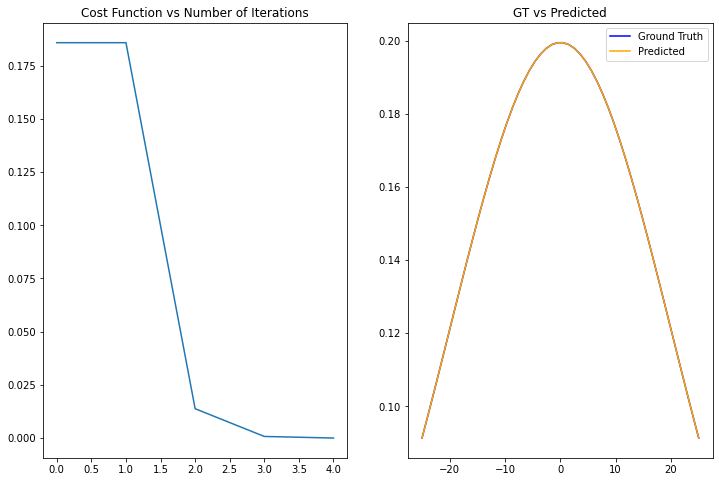

Number of iterations =  6
Estimated Parameters =  [[1.00000000e+01 3.54518877e-16 2.00000000e+01]]
Final Cost = 1.7422276227581992e-23


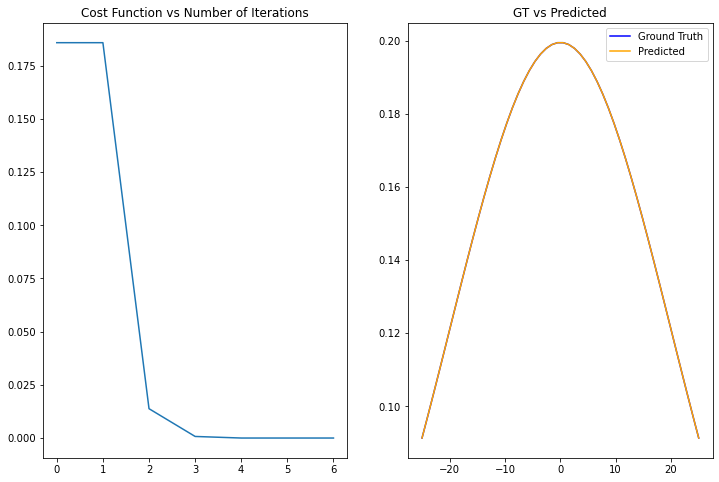

Number of iterations =  8
Estimated Parameters =  [[1.00000000e+01 3.54518877e-16 2.00000000e+01]]
Final Cost = 0.0


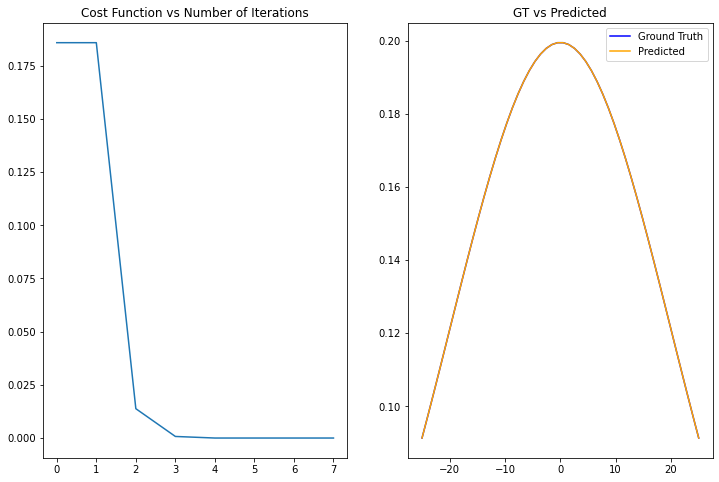

In [118]:
iter = 2
tolerance = 1e-16
a = 12
m = 10
s = 19.12
print("Number of iterations = ",iter)
plot_GN(iter,tolerance,a,m,s)
plt.show()

iter = 4
tolerance = 1e-16
a = 12
m = 10
s = 19.12
print("Number of iterations = ",iter)
plot_GN(iter,tolerance,a,m,s)
plt.show()

iter = 6
tolerance = 1e-16
a = 12
m = 10
s = 19.12
print("Number of iterations = ",iter)
plot_GN(iter,tolerance,a,m,s)
plt.show()

iter = 8
tolerance = 1e-16
a = 12
m = 10
s = 19.12
print("Number of iterations = ",iter)
plot_GN(iter,tolerance,a,m,s)
plt.show()

## Varying Tolerance

Tolerance =  100
Estimated Parameters =  [[10.20201362  3.35984354 22.09153975]]
Final Cost = 0.1858428345030164


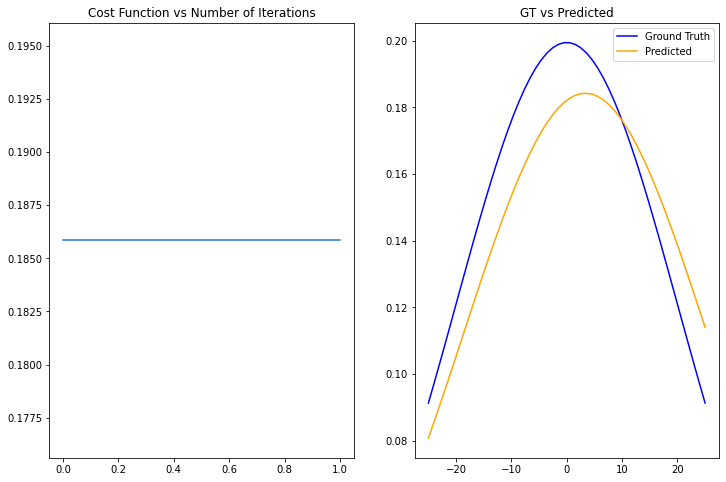

Tolerance =  1
Estimated Parameters =  [[1.00000000e+01 3.54518877e-16 2.00000000e+01]]
Final Cost = 0.0


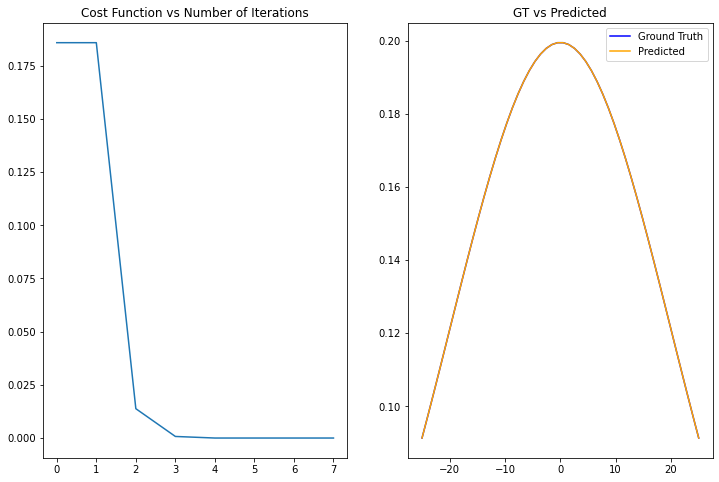

Tolerance =  0.01
Estimated Parameters =  [[1.00000000e+01 3.54518877e-16 2.00000000e+01]]
Final Cost = 0.0


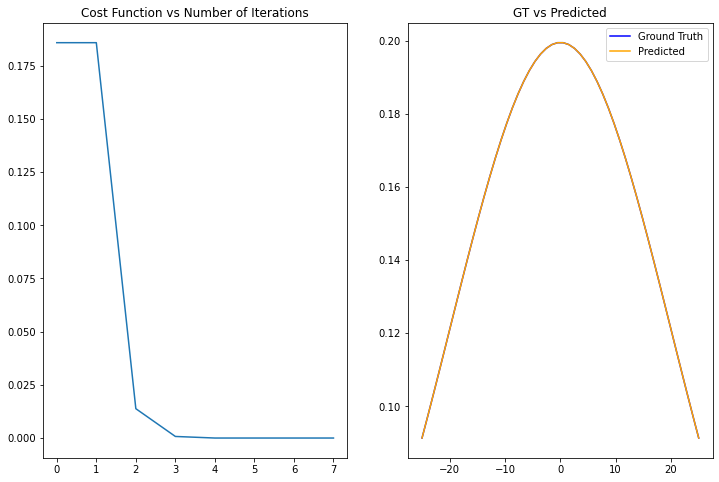

Tolerance =  1e-16
Estimated Parameters =  [[1.00000000e+01 3.54518877e-16 2.00000000e+01]]
Final Cost = 0.0


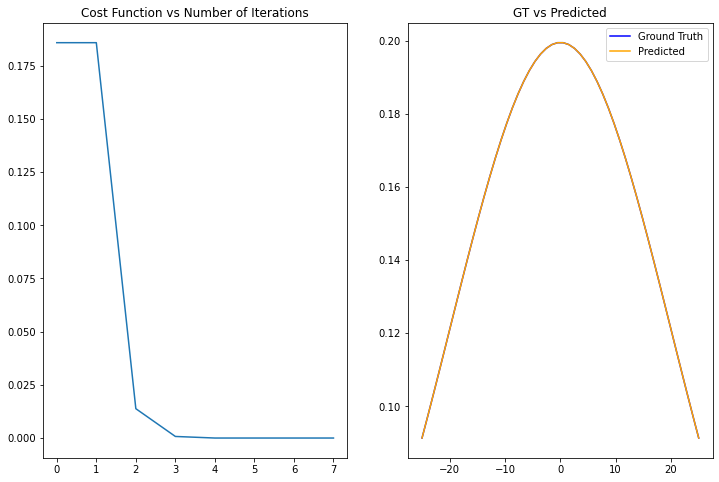

In [119]:
iter = 10
tolerance = 100
a = 12
m = 10
s = 19.12
print("Tolerance = ",tolerance)
plot_GN(iter,tolerance,a,m,s)
plt.show()

iter = 10
tolerance = 1
a = 12
m = 10
s = 19.12
print("Tolerance = ",tolerance)
plot_GN(iter,tolerance,a,m,s)
plt.show()

iter = 10
tolerance = 1e-2
a = 12
m = 10
s = 19.12
print("Tolerance = ",tolerance)
plot_GN(iter,tolerance,a,m,s)
plt.show()

iter = 10
tolerance = 1e-16
a = 12
m = 10
s = 19.12
print("Tolerance = ",tolerance)
plot_GN(iter,tolerance,a,m,s)
plt.show()

## Varying Initial Parameters

a,m,s =  12 10 19.12
Estimated Parameters =  [[1.00000000e+01 3.54518877e-16 2.00000000e+01]]
Final Cost = 0.0


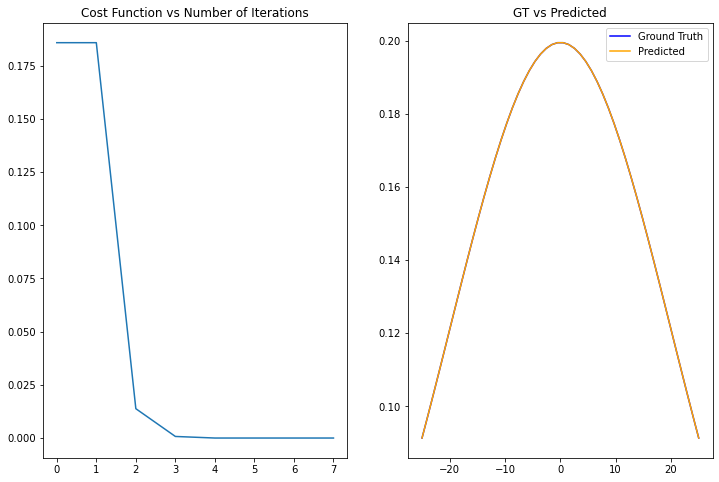

a,m,s =  20 4 10
Estimated Parameters =  [[1.00000000e+01 8.64177637e-17 2.00000000e+01]]
Final Cost = 2.9851914138002156e-32


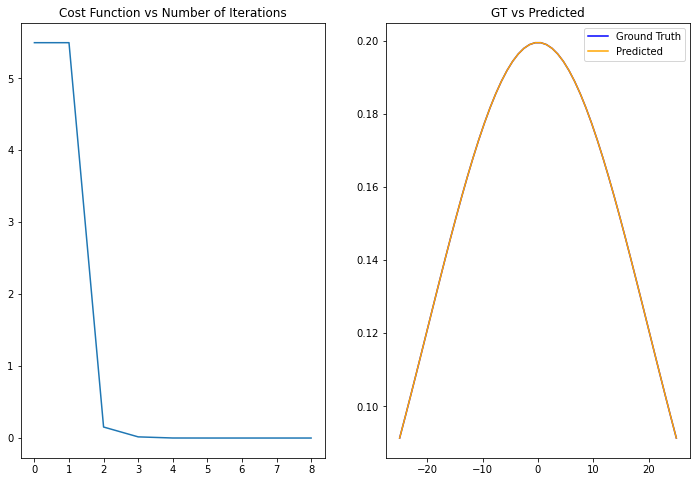

a,m,s =  5 1 2
Estimated Parameters =  [[1.00000000e+01 5.21576222e-16 2.00000000e+01]]
Final Cost = 7.703719777548943e-34


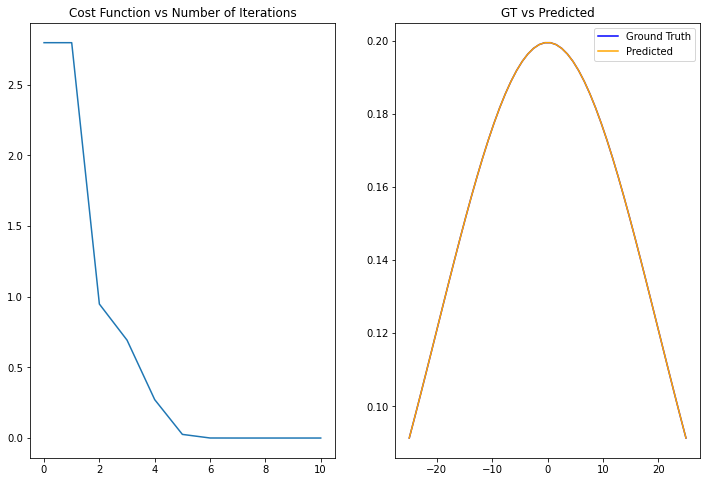

a,m,s =  30 30 30
Estimated Parameters =  [[5.96113737e+15 1.65242954e+15 5.08530802e+14]]
Final Cost = 0.9395650472351744


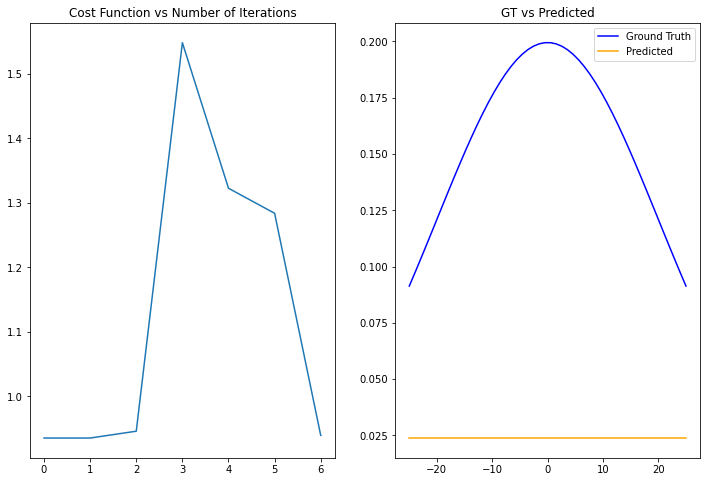

In [120]:
iter = 10
tolerance = 1e-16
a = 12
m = 10
s = 19.12
print("a,m,s = ",a,m,s)
plot_GN(iter,tolerance,a,m,s)
plt.show()

iter = 10
tolerance = 1e-16
a = 20
m = 4
s = 10
print("a,m,s = ",a,m,s)
plot_GN(iter,tolerance,a,m,s)
plt.show()

iter = 10
tolerance = 1e-16
a = 5
m = 1
s = 2
print("a,m,s = ",a,m,s)
plot_GN(iter,tolerance,a,m,s)
plt.show()

iter = 10
tolerance = 1e-16
a = 30
m = 30
s = 30
print("a,m,s = ",a,m,s)
plot_GN(iter,tolerance,a,m,s)
plt.show()

# 3 Varying Parameters of Levenberg Marquard

In [121]:
def plot_LM(iter,Lambda,tolerance,a,m,s):
    #Gauss Newton:
    num_obs = 50
    k,cost_func = levenberg_marquardt(num_obs,iter,Lambda,tolerance,a,m,s)

    print("Estimated Parameters = ",k.T)
    print("Final Cost =", cost_func[-1])

    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,8))

    #Plotting Cost function vs number of iter.
    ax1.plot(cost_func)
    ax1.set_title("Cost Function vs Number of Iterations")
    #ax1.xlabel('Number of Iterations')
    #ax1.ylabel('Cost Function')

    #Plotting GT data values vs Predicted data values
    x = np.linspace(-25,25,num_obs)
    y_gt = make_gaussian(x,a_gt,m_gt,s_gt)
    y_pred = make_gaussian(x,k[0,0],k[1,0],k[2,0])
    ax2.plot(x,y_gt,color='blue',label='Ground Truth')
    ax2.plot(x,y_pred,color='orange',label = 'Predicted')
    ax2.set_title("GT vs Predicted")
    ax2.legend(loc='best')

## Varying number of iterations

Number of iterations =  2
Estimated Parameters =  [[11.88707001  9.95914134 19.20351046]]
Final Cost = 0.1829868774569548


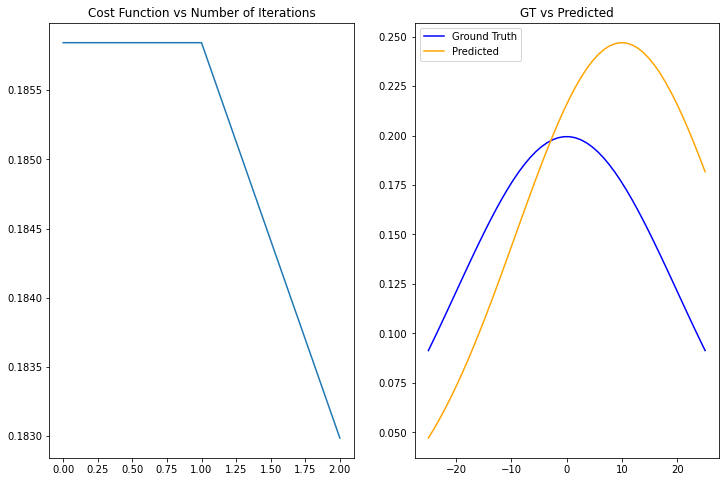

Number of iterations =  5
Estimated Parameters =  [[10.65694255  8.88248556 20.46287665]]
Final Cost = 0.1200217672941961


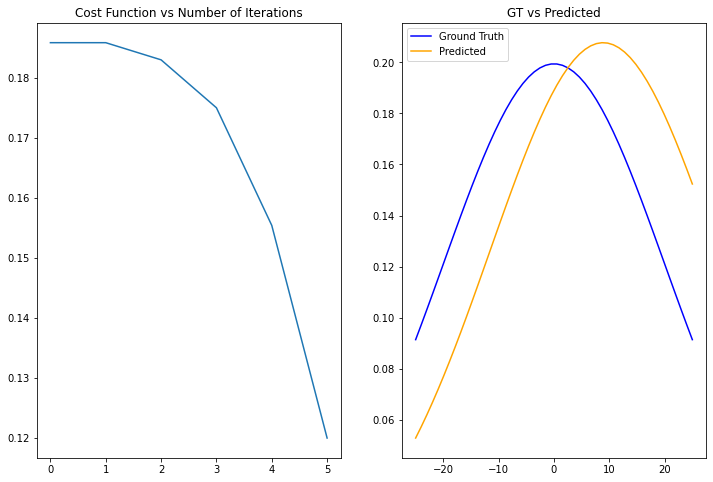

Number of iterations =  10
Estimated Parameters =  [[1.00158226e+01 3.39231765e-04 2.00495910e+01]]
Final Cost = 0.00017575510763879316


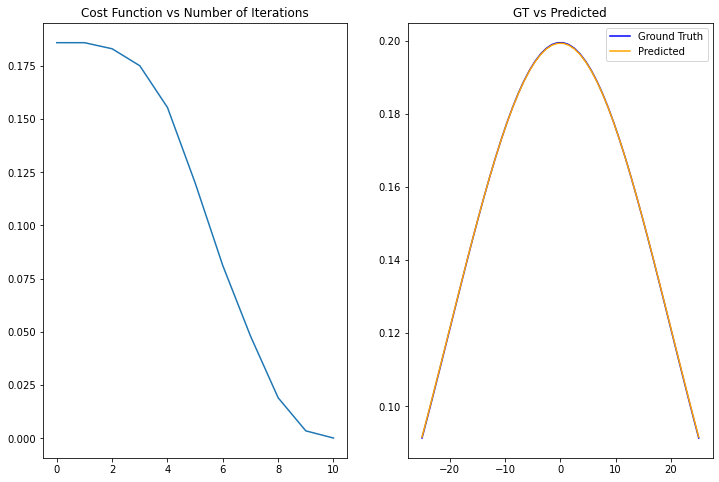

Number of iterations =  20
Estimated Parameters =  [[1.00000000e+01 6.78553394e-17 2.00000000e+01]]
Final Cost = 0.0


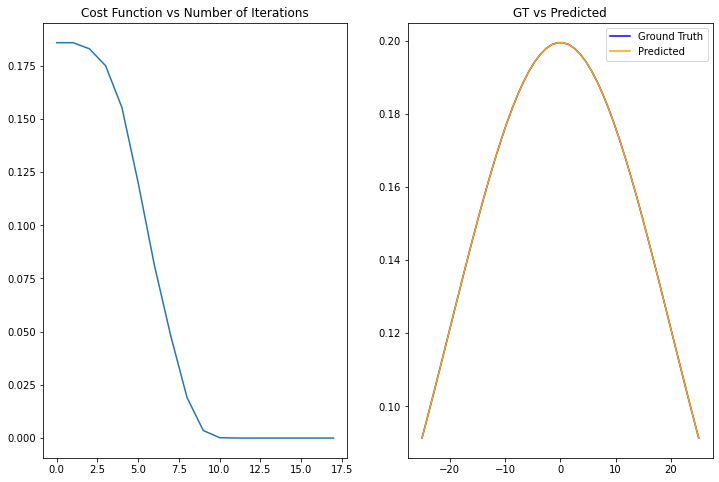

In [122]:
iter = 2
tolerance = 1e-16
Lambda = 1
a = 12
m = 10
s = 19.12
print("Number of iterations = ",iter)
plot_LM(iter,Lambda,tolerance,a,m,s)
plt.show()

iter = 5
tolerance = 1e-16
Lambda = 1
a = 12
m = 10
s = 19.12
print("Number of iterations = ",iter)
plot_LM(iter,Lambda,tolerance,a,m,s)
plt.show()

iter = 10
tolerance = 1e-16
Lambda = 1
a = 12
m = 10
s = 19.12
print("Number of iterations = ",iter)
plot_LM(iter,Lambda,tolerance,a,m,s)
plt.show()

iter = 20
tolerance = 1e-16
Lambda = 1
a = 12
m = 10
s = 19.12
print("Number of iterations = ",iter)
plot_LM(iter,Lambda,tolerance,a,m,s)
plt.show()

## Varying Lambda

Lambda =  0.001
Estimated Parameters =  [[1.00000000e+01 2.83917924e-16 2.00000000e+01]]
Final Cost = 1.4637067577342992e-31


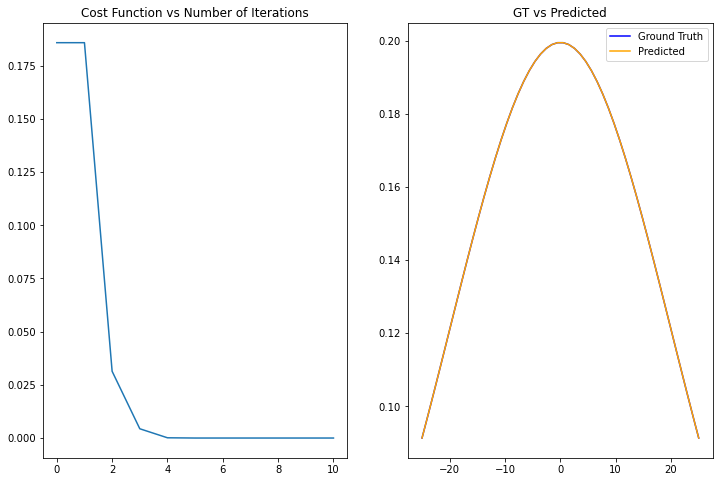

Lambda =  0.01
Estimated Parameters =  [[1.00000000e+01 3.84789931e-15 2.00000000e+01]]
Final Cost = 4.026502684711712e-19


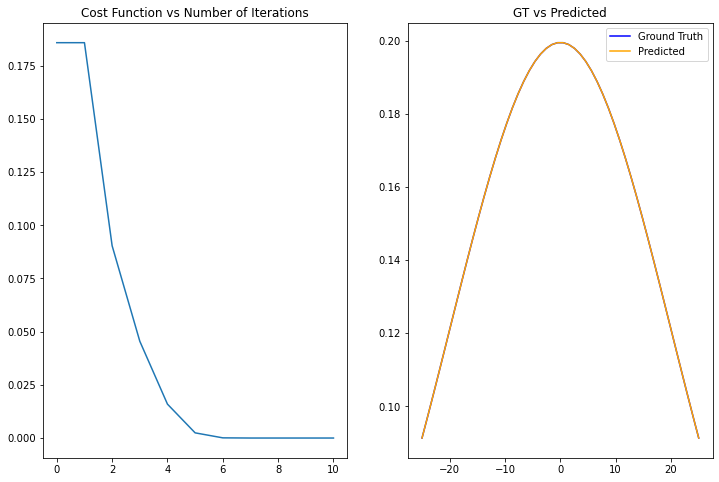

Lambda =  1
Estimated Parameters =  [[1.00158226e+01 3.39231765e-04 2.00495910e+01]]
Final Cost = 0.00017575510763879316


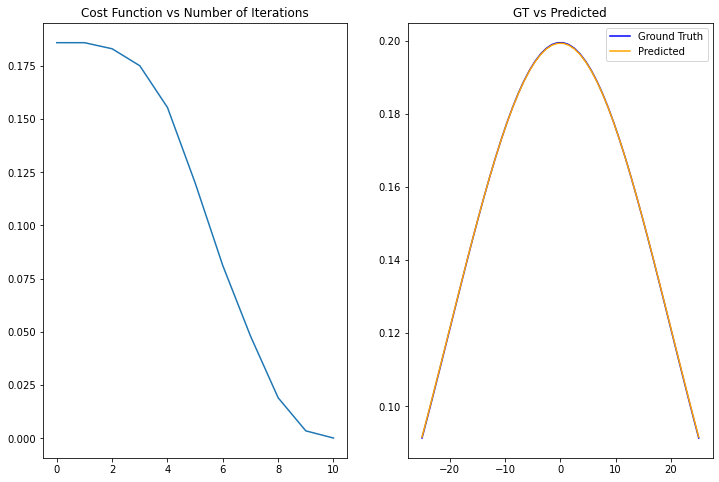

Lambda =  10
Estimated Parameters =  [[10.56936234  1.74902012 22.07141731]]
Final Cost = 0.021403451586080438


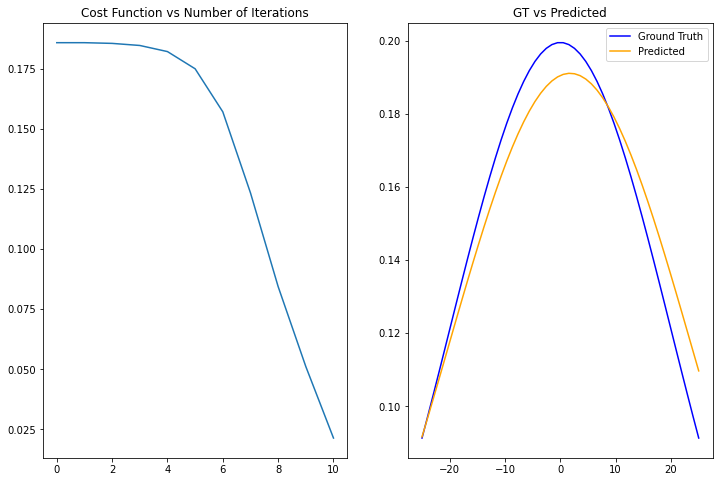

In [123]:
iter = 10
tolerance = 1e-16
Lambda = 0.001
a = 12
m = 10
s = 19.12
print("Lambda = ",Lambda)
plot_LM(iter,Lambda,tolerance,a,m,s)
plt.show()

iter = 10
tolerance = 1e-16
Lambda = 0.01
a = 12
m = 10
s = 19.12
print("Lambda = ",Lambda)
plot_LM(iter,Lambda,tolerance,a,m,s)
plt.show()

iter = 10
tolerance = 1e-16
Lambda = 1
a = 12
m = 10
s = 19.12
print("Lambda = ",Lambda)
plot_LM(iter,Lambda,tolerance,a,m,s)
plt.show()

iter = 10
tolerance = 1e-16
Lambda = 10
a = 12
m = 10
s = 19.12
print("Lambda = ",Lambda)
plot_LM(iter,Lambda,tolerance,a,m,s)
plt.show()

## Varying Tolerance

Tolerance =  100
Estimated Parameters =  [[11.97073277  9.98978099 19.14144259]]
Final Cost = 0.1858428345030164


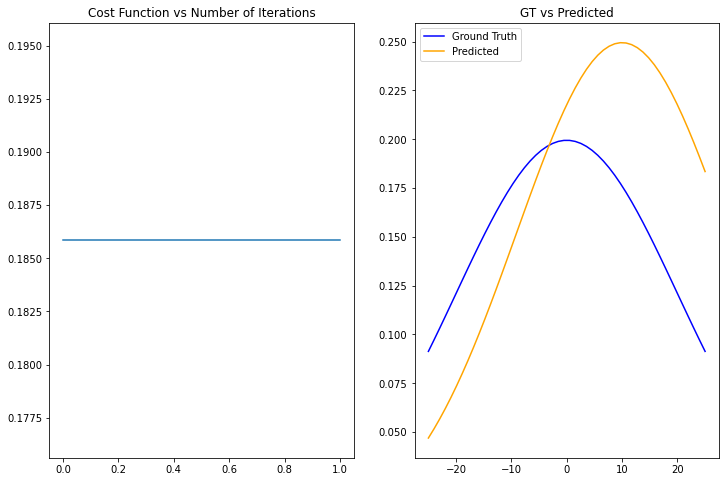

Tolerance =  1
Estimated Parameters =  [[1.00158226e+01 3.39231765e-04 2.00495910e+01]]
Final Cost = 0.00017575510763879316


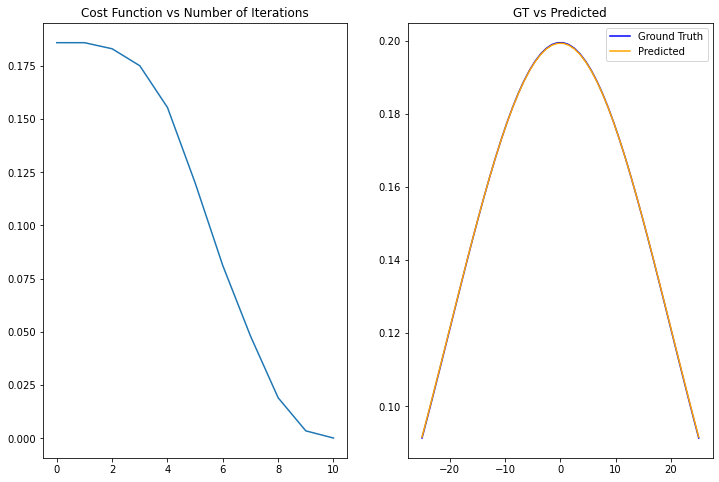

Tolerance =  0.0001
Estimated Parameters =  [[1.00158226e+01 3.39231765e-04 2.00495910e+01]]
Final Cost = 0.00017575510763879316


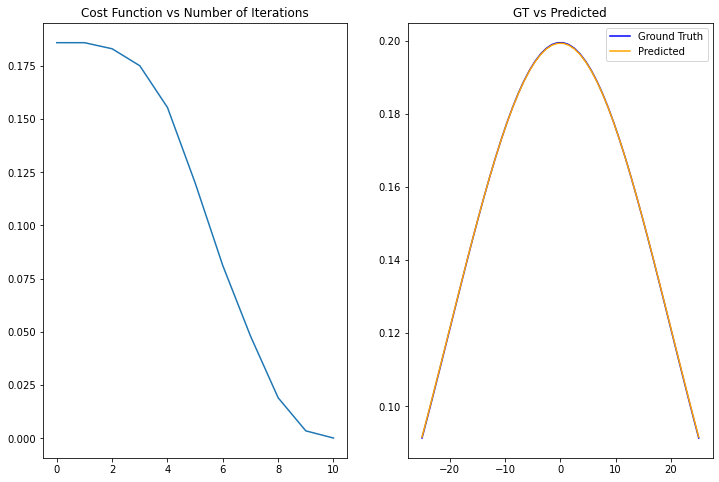

Tolerance =  1e-16
Estimated Parameters =  [[1.00158226e+01 3.39231765e-04 2.00495910e+01]]
Final Cost = 0.00017575510763879316


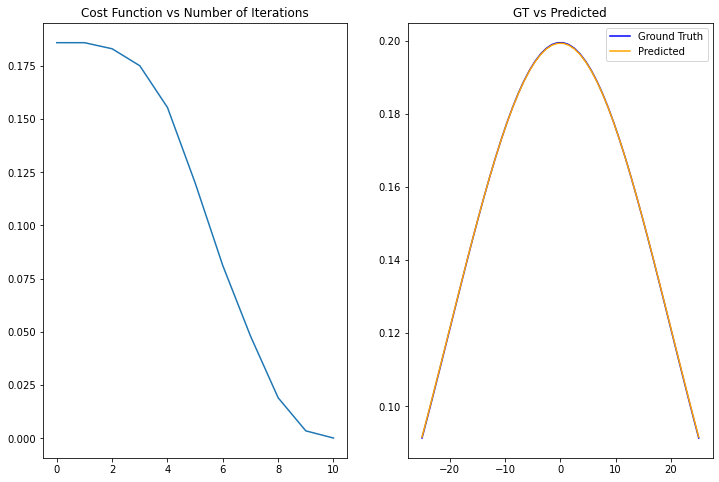

In [124]:
iter = 10
tolerance = 100
Lambda = 1
a = 12
m = 10
s = 19.12
print("Tolerance = ",tolerance)
plot_LM(iter,Lambda,tolerance,a,m,s)
plt.show()

iter = 10
tolerance = 1
Lambda = 1
a = 12
m = 10
s = 19.12
print("Tolerance = ",tolerance)
plot_LM(iter,Lambda,tolerance,a,m,s)
plt.show()

iter = 10
tolerance = 1e-4
Lambda = 1
a = 12
m = 10
s = 19.12
print("Tolerance = ",tolerance)
plot_LM(iter,Lambda,tolerance,a,m,s)
plt.show()

iter = 10
tolerance = 1e-16
Lambda = 1
a = 12
m = 10
s = 19.12
print("Tolerance = ",tolerance)
plot_LM(iter,Lambda,tolerance,a,m,s)
plt.show()

## Varying Initial Values

a,m,s =  12 10 19.12
Estimated Parameters =  [[1.00000000e+01 6.78553394e-17 2.00000000e+01]]
Final Cost = 0.0


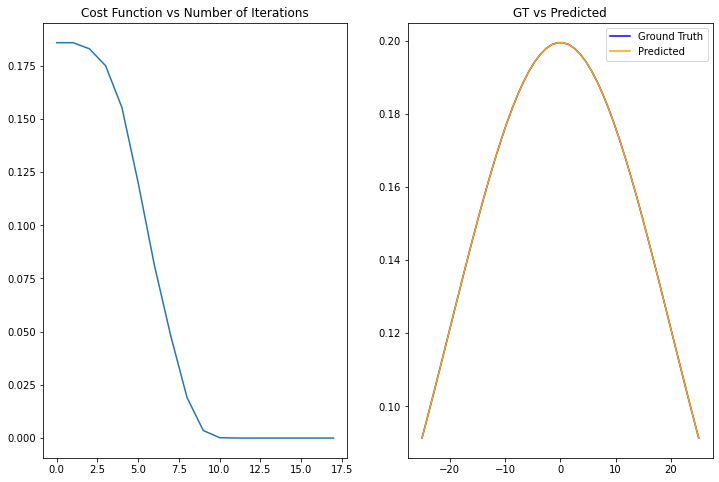

a,m,s =  20 4 10
Estimated Parameters =  [[ 1.0000000e+01 -4.1361808e-16  2.0000000e+01]]
Final Cost = 2.908154216024726e-32


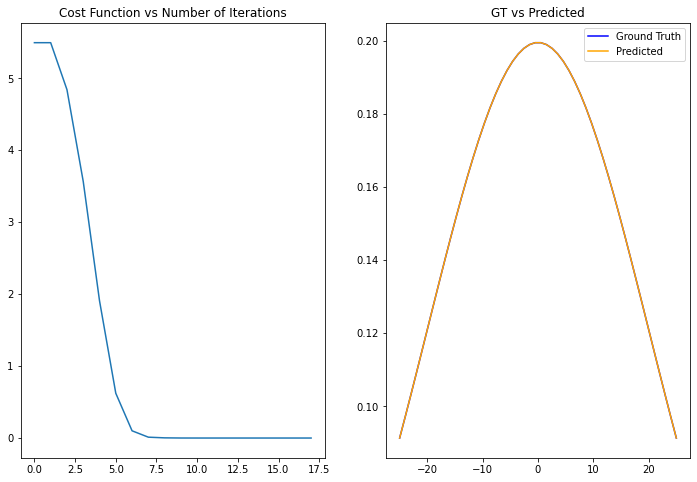

a,m,s =  5 1 2
Estimated Parameters =  [[1.00000000e+01 8.61137227e-17 2.00000000e+01]]
Final Cost = 2.9851914138002156e-32


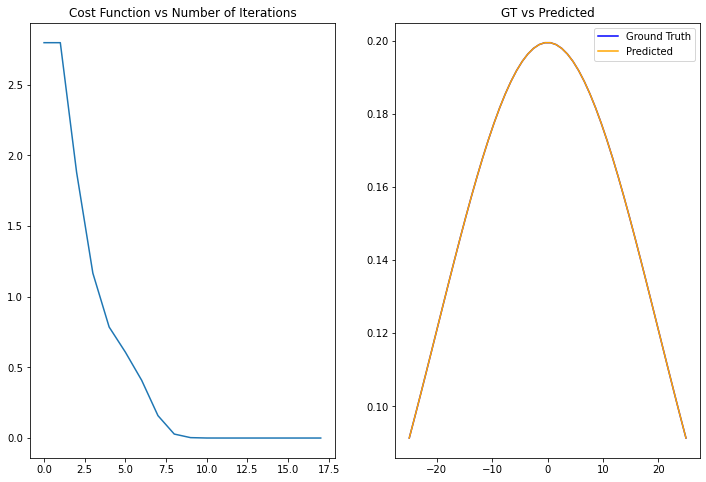

a,m,s =  30 30 30
Estimated Parameters =  [[ 1.00000000e+01 -7.53799499e-16  2.00000000e+01]]
Final Cost = 7.703719777548943e-34


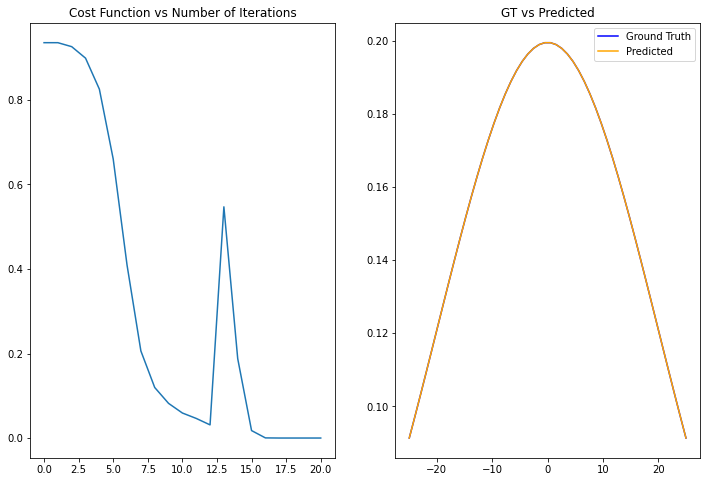

In [125]:
iter = 20
tolerance = 1e-16
Lambda = 1
a = 12
m = 10
s = 19.12
print("a,m,s = ",a,m,s)
plot_LM(iter,Lambda,tolerance,a,m,s)
plt.show()

iter = 20
tolerance = 1e-16
Lambda = 1
a = 20
m = 4
s = 10
print("a,m,s = ",a,m,s)
plot_LM(iter,Lambda,tolerance,a,m,s)
plt.show()

iter = 20
tolerance = 1e-16
Lambda = 1
a = 5
m = 1
s = 2
print("a,m,s = ",a,m,s)
plot_LM(iter,Lambda,tolerance,a,m,s)
plt.show()

iter = 20
tolerance = 1e-16
Lambda = 1
a = 30
m = 30
s = 30
print("a,m,s = ",a,m,s)
plot_LM(iter,Lambda,tolerance,a,m,s)
plt.show()

### Theory Question 1). 
We have tweaked the values of initial estimate and learning rate. The plots for them are given above

### GD

Alpha is varied as follows:<br>
Alpha = 500 results in divergence as alpha is too large.     
Alpha = 1 results in great convergence (low error)<br>
Alpha = 0.01 results in poor convergence (large error)<br>
Alpha = 0.001 results in poor convergence (large error)<br>
So we observe smaller learning rate takes smaller steps and require more iterations to reach the minmum, whereas larger learning rate can reach the minimum faster, but too large of a learning rate can lead to bigger jumps and hence it leads to divergence. So alpha should be taken somewhere in between.

For initial estimate, we see from the plots and initial values that we get cost function close to zero for most of the initial values in less iterations.<br>
Ex: (12,10,19,12) converges to (10,0,20) for less iterations<br>
Ex: (20,4,10) converges to (10,0,20) for less iterations<br>
Ex: (5,1,2) converges to (10,0,20) for less iterations<br>

But some values do not converge completely.<br>
Ex: (30,30,30) does not converge to (10,0,20) for less iterations


## LM
Lambda is varied as follows: <br>
Lambda = 0.001 results in great convergence (very small error)<br>
Lambda = 0.01 results in great convergence (very small error)<br>
Lambda = 1 results in poor convergence (large error)<br>
Lambda = 10 results in poor convergence (large error)<br>

For initial estimate, we see from the plots and initial values that we get cost function close to zero for most of the initial values in less iterations.<br>
Ex: (12,10,19,12) converges to (10,0,20) for less iterations<br>
Ex: (20,4,10) converges to (10,0,20) for less iterations<br>
Ex: (5,1,2) converges to (10,0,20) for less iterations<br>
Ex: (30,30,30) converge to (10,0,20) for less iterations

## Observations: 
1) (30,30,30) converges only in Levenberg Maraquadt.
2) LM and GN require much less iterations when compared to GD

### Theory Question 2). 
We are able to observe that:

Levenberg Marquadt is able to achieve convergence (least error) in least number of iterations(around 3 to 5).Whereas Gauss Newton is able to converge the error to zero in relatively more iterations. Gradient Descent requires the most number of iterations (around 5000) to achieve convergence.

We know from theory that this is correct because LM is an approach which uses the properties of both GD and GN.<br>
We know gradient Descent moves in the opposite direction of slope, and gauss newton uses matrix multiplication properties to find the next estimate. Levenberg Marquadt uses lambda, which changes based on the change in loss:<br>
If loss decrease, we divide lambda by 3<br>
If loss increases, we multiply lambda by 2<br>


# 2. Iterative Closest Point

In this subsection, we will code the Iterative Closest Point algorithm to find the alignment between two point clouds without known correspondences. The point cloud that you will be using is the same as the one that you used in Assignment 1.

## 2.1: Procrustes alignment

1. Write a function that takes two point clouds as input wherein the corresponding points between the two point clouds are located at the same index and returns the transformation matrix between them.
2. Use the bunny point cloud and perform the procrustes alignment between the two bunnies. Compute the absolute alignment error after aligning the two bunnies.
3. Make sure your code is modular as we will use this function in the next sub-part.
4. Prove mathematically why the Procrustes alignment gives the best aligning transform between point clouds with known correspondences.


In [126]:
import math
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d
import copy

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


INFO - 2021-10-17 03:04:40,539 - utils - NumExpr defaulting to 8 threads.


In [127]:
# Answer 1
def procrustes_alignment(pts1, pts2):
    # ptCloud1, ptCloud2 are of size 3 x n

    dim, N = pts1.shape
    centre1 = np.mean(pts1, axis = 1)[..., None]
    centre2 = np.mean(pts2, axis = 1)[..., None]
    
    pts1_centred = pts1 - centre1
    pts2_centred = pts2 - centre2

    S = pts1_centred @ pts2_centred.T
    U, D, Vt = np.linalg.svd(S)

    R = U @ Vt

    #C = np.eye(3)
    #C[2][2] = np.linalg.det(U @ Vt)
    #R = U @ C @ Vt

    if np.linalg.det(R) < 0:
        Vt[2, :] *= -1
        R = U @ Vt

    t = centre1 - R @ centre2

    T = np.eye(4)
    T[:3, :3], T[:3, 3] = R, t[:, 0]

    return [T, R, t]
    

In [128]:
def getRotationMatrix(alpha,beta,gama):

    R = np.zeros((3,3))
    R[0,0] = math.cos(alpha)*math.cos(beta)
    R[0,1] = math.cos(alpha)*math.sin(beta)*math.sin(gama) - math.sin(alpha)*math.cos(gama) 
    R[0,2] = math.cos(alpha)*math.sin(beta)*math.cos(gama) + math.sin(alpha)*math.sin(gama)
    R[1,0] = math.sin(alpha)*math.cos(beta) 
    R[1,1] = math.sin(alpha)*math.sin(beta)*math.sin(gama) + math.cos(alpha)*math.cos(gama)
    R[1,2] = math.sin(alpha)*math.sin(beta)*math.cos(gama) - math.cos(alpha)* math.sin(gama)
    R[2,0] = -1*math.sin(beta)
    R[2,1] = math.cos(beta)*math.sin(gama)
    R[2,2] = math.cos(beta)*math.cos(gama)

    return R

In [129]:
def visualiseBunnies(bunny, T):
    #Color the bunny red
    bunny.paint_uniform_color([1,0,0])

    #get the coordinate axes
    mesh_frame =  o3d.geometry.TriangleMesh.create_coordinate_frame(size=.1,origin=[0,0,0])

    #Get the transformed bunny
    bunny_transform = copy.deepcopy(bunny).transform(T)

    #Get the transformed coordinate axes
    mesh_frame_transform = copy.deepcopy(mesh_frame).transform(T)

    #Color the transformed bunny blue
    bunny_transform.paint_uniform_color([0, 0, 1])

    #Visualize all of them together
    o3d.visualization.draw_geometries([bunny, mesh_frame, bunny_transform, mesh_frame_transform])


In [130]:
#Calculating absolute alignment error as MSE

def absoluteError(pts1, pts2):
    error = np.mean(np.mean(np.square(pts1 - pts2)))
    return error

In [131]:
def getTransformedPoints(pts, R, t):
    #pts is a 3 x N matrix
    #print(" pts shape:", pts.shape, " R:", R.shape, "t shape:", t.shape, "\n")
    ptsTransformed = R @ pts
    for i in range(ptsTransformed.shape[1]):
        ptsTransformed[:, i] += t
    return ptsTransformed

In [132]:

#Visulaize initial configuration:
bunnyPath = "bunny.ply"
bunny = o3d.io.read_point_cloud(bunnyPath)
print(bunny)

#Get the position matrix
bunnyPts = np.asarray(bunny.points).T
#print(bunnyPts.T)


#Get the transformation
T_12 = np.eye(4)
R_12 = getRotationMatrix(0, 0, np.pi/2)
t_12 = np.array([0, 0, 0.5])
T_12[:3, :3], T_12[:3, 3] = R_12, t_12

bunnyPts2 = getTransformedPoints(bunnyPts, R_12, t_12)

#Get the transformed bunny
bunny_transform = copy.deepcopy(bunny).transform(T_12)

#Get the position matrix
bunnyTransformedPts = np.asarray(bunny_transform.points).T
#print(bunnyTransformedPts.T)

#visualiseBunnies(bunny, T_12)
[T, R, t] = procrustes_alignment(bunnyPts, bunnyTransformedPts)

print(T_12, "from fn:\n", T, " inv:\n", np.linalg.inv(T))

visualiseBunnies(bunny, T)
visualiseBunnies(bunny, T_12 @ T)

print("Is the following matrix should be I (4x4):\n", T_12 @ T)

bunnyPts2Transformed = R @ bunnyPts2 + t
print("The absolute error is:\n", absoluteError(bunnyPts, bunnyPts2Transformed))

PointCloud with 35947 points.
[[ 1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00]
 [ 0.000000e+00  6.123234e-17 -1.000000e+00  0.000000e+00]
 [-0.000000e+00  1.000000e+00  6.123234e-17  5.000000e-01]
 [ 0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00]] from fn:
 [[ 1.00000000e+00 -1.94885852e-16 -1.09017582e-16  5.55111512e-17]
 [ 1.14711926e-16 -6.39496469e-17  1.00000000e+00 -5.00000000e-01]
 [-1.50011672e-16 -1.00000000e+00  8.02068255e-17 -4.68375339e-17]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]  inv:
 [[ 1.00000000e+00  1.09017582e-16 -1.94885852e-16 -1.00236000e-18]
 [-1.50011672e-16  8.02068255e-17 -1.00000000e+00 -6.73412112e-18]
 [-1.14711926e-16  1.00000000e+00 -6.39496469e-17  5.00000000e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Is the following matrix should be I (4x4):
 [[ 1.00000000e+00 -1.94885852e-16 -1.09017582e-16  5.55111512e-17]
 [ 1.50011672e-16  1.00000000e+00 -1.89744855e-17  1.62213639e-17]


**Answer 4.** Proof attached as a pdf file.

## 2.2: ICP alignment

1. Write a function that takes two point clouds as input without known correspondences and perform the iterative closest point algorithm.
2. Perform the ICP alignment between the two bunnies and plot their individual coordinate frames as done in class.
3. Does ICP always give the correct alignment? Why or Why not?
4. What are other variants of ICP and why are they helpful (you can look at point to plane ICP)?

In [133]:
from sklearn.neighbors import KDTree

def getNearestNeighbors(pts1, pts2):
    # pts1 : 3 x N
    pts1_temp, pts2_temp = np.copy(pts1.T), np.copy(pts2.T)
    # pts1_temp : N x 3
    tree = KDTree(pts1_temp)
    dist, ind = tree.query(pts2_temp, k = 1)

    return [dist, ind]

In [134]:
def visualiseBunnyPts(ptCloud, ptCloud2, mesh_frame, mesh_frame_transform, saveResults = False, iteration = 0):

    pcd1 = o3d.geometry.PointCloud()
    pcd1.points = o3d.utility.Vector3dVector(ptCloud.T)
    o3d.io.write_point_cloud("bunnyOriginal.ply", pcd1)

    # Load saved point cloud and visualize it
    bunny = o3d.io.read_point_cloud("bunnyOriginal.ply")

    pcd2 = o3d.geometry.PointCloud()
    pcd2.points = o3d.utility.Vector3dVector(ptCloud2.T)
    o3d.io.write_point_cloud("bunnyTransformed.ply", pcd2)

    # Load saved point cloud and visualize it
    bunny_transform = o3d.io.read_point_cloud("bunnyTransformed.ply")

    # Color the bunny red
    bunny.paint_uniform_color([1,0,0])

    # Color the transformed bunny blue
    bunny_transform.paint_uniform_color([0, 0, 1])

    # Visualize all of them together
    o3d.visualization.draw_geometries([bunny, mesh_frame, bunny_transform, mesh_frame_transform])

    if saveResults:
        o3d.io.write_point_cloud("results/ICP_at_" + str(iteration) + "iteration" + ".pcd", [bunny_transform, bunny, mesh_frame, mesh_frame_transform])

In [135]:
def ICP(pts1_input, pts2_input, coordinateframe1_input, coordinateframe2_input, iterations, displayStep = 1, tolerance = 0.00000000001):

    # Copy the input first, because they'll get changed/lost otherwise
    pts1, pts2 = np.copy(pts1_input), np.copy(pts2_input)
    coordinateframe1, coordinateframe2 = copy.deepcopy(coordinateframe1_input), copy.deepcopy(coordinateframe2_input)
    error = absoluteError(pts1, pts2)
    T_cumulative = np.eye(4)
    
    # Visualize the initial positions
    print("Orignial Locations...\n")
    visualiseBunnyPts(pts1, pts2, coordinateframe1, coordinateframe2)

    for iteration in range(1, iterations + 1):

        if iteration != 1 and error < tolerance:
            print("ICP stopped at the iteration ", iteration - 1, " with the absolute error as", error,", here the centroid of the 2 bunnies are", np.mean(np.mean(pts1)), np.mean(np.mean(pts2)),"\n")
            return

        [distance, indices] = getNearestNeighbors(pts1, pts2)
        pts2_nearest = pts2[:, indices][:, :, 0]
        [T, R, t] = procrustes_alignment(pts1, pts2_nearest)

        T_cumulative = T_cumulative @ np.linalg.inv(T)
        pts2 = getTransformedPoints(pts2, R, t[:, 0])
        coordinateframe2 = coordinateframe2.transform(T)
        error = absoluteError(pts1, pts2)
        print("Error at iteration no", iteration," is equal to", error, "\n")

        if(iteration % displayStep == 0 or iteration == iterations or error < tolerance):
            print("Visualization at the ", iteration, "iteration...\n")
            visualiseBunnyPts(pts1, pts2, coordinateframe1, coordinateframe2)

    print("ICP could not approximate the transmortation within", iterations, " iterations, the absolute error stagnated around", error," and the centroid of the 2 bunnies are", np.mean(np.mean(pts1)), np.mean(np.mean(pts2)),"\n")

In [137]:
#Visulaize initial configuration:
bunnyPath = "bunny.ply"
bunny = o3d.io.read_point_cloud(bunnyPath)

#Get the position matrix
bunnyPts = np.asarray(bunny.points).T

#get the coordinate axes
mesh_frame = o3d.geometry.TriangleMesh.create_coordinate_frame(size=.1,origin=[0,0,0])

#Get the transformation
T_12 = np.eye(4)
R_12 = getRotationMatrix(0, 0, np.pi/2)
t_12 = np.array([0, 0, 5])
T_12[:3, :3], T_12[:3, 3] = R_12, t_12

bunnyPts2 = getTransformedPoints(bunnyPts, R_12, t_12)
mesh_frame_transform = copy.deepcopy(mesh_frame).transform(T_12)

# Set number of iterations to run
iterations = 100
ICP(bunnyPts, bunnyPts2, mesh_frame, mesh_frame_transform, iterations, 10)

Orignial Locations...

Error at iteration no 1  is equal to 0.003079529818050385 

Error at iteration no 2  is equal to 0.002235678472367941 

Error at iteration no 3  is equal to 0.0019780486325649176 

Error at iteration no 4  is equal to 0.001760232476250233 

Error at iteration no 5  is equal to 0.0017402267266533292 

Error at iteration no 6  is equal to 0.0016078964995538344 

Error at iteration no 7  is equal to 0.001611999422207814 

Error at iteration no 8  is equal to 0.001506431073726959 

Error at iteration no 9  is equal to 0.0014938808735914715 

Error at iteration no 10  is equal to 0.001404398221847353 

Visualization at the  10 iteration...

Error at iteration no 11  is equal to 0.0013816500143179098 

Error at iteration no 12  is equal to 0.0013019217413744628 

Error at iteration no 13  is equal to 0.0012766138675339947 

Error at iteration no 14  is equal to 0.0012063004136090144 

Error at iteration no 15  is equal to 0.0011813060021104902 

Error at iteration no 1

*THEORETICAL ANSWERS*

**Answer 3**

In genral, ICP doesn't always give the coorect alignment because of the noisy depths associated with the Lidar calculations. Even after assuming ideal non-noisy position coordinates the ICP alignment may not always work. The ICP relies heavily on the orthogonal procrustus alignment which relies on the correspondences between the two set of points. If the corresponsences are correct, the proctrustus would give us the answer in just one iteration, however if its not the correct one, the absolute error wouldn't have gone to close to zero values. Here, the absolute error remains much larger than the tolerance, hence we run the algorithm once again and repeat the process. At every ICP iteration, we perform a nearest neighbor search. What that does is basically for each point int set_2 it tries to find its nearest neighbor in set_1, this way by assuming the correspondences we apply the procrutus alignment. Therefore if the correspondences are nerver matched properly we will never get the correct alignment. After trying out a few testcases, we have noticed that when the either the bunny's orientation or its location is changed by a significant amount, it becomes very difficult for the bunny to get aligned to the desired orientation  but its *position still gets aligned pretty well*. This misalignment in orientation arises due to a certain *local minima in the error value* which forces the procrustus alignment to not change it significantly because no small change in the rotation matrix can give a lower error value than the one already achieved and in order to reach the perfect alignment (error = 0), the alignment must first increase the error value and then decrease to the global minima.

**Answer 4**

In the normal ICP algorithm each point in one data set is paired with the closest point in the other data set to form correspondences. Then a point to point error metric is calculated in which the sum of the squared distance between points in each correspondence pair is minimized. The process is iterated until the error becomes smaller than a tolerance value or it stops changing. On the other hand, in *point to plane ICP*, the error metric minimizes the sum of the squared distance between a point and the tangent
plane at its correspondence point, the figure uploaded in the results folder can be referred for more clarity on the geometry. Although each iteration of the point to plane ICP algorithm is generally slower than the point to point version, it has been observed the *convergence rates are faster* in the former, which is why it is so widely used.

Genralized ICP is an algorthm which aims to combine the Iterative Closest Point and the point to plane ICP algorithms into a single probabilistic framework. This framework is then used to model the locally planar surface structure from both scans instead of just one scan as done in the point to plane algorithm. This can be realized as a plane to plane ICP. The new approach is shown to have outperformed both the standard ICP and the point to plane ICP approaches. In addition to being *more robust* to incorrect correspondences, outliers, and noisy measurement depths, it has demostrated an *improved performance* level and can also *incorporate probabilistic models* while maintaining the normal ICP's speed and simplicity.